# Import Module and Settings

In [1]:
# Import libraries 

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Import datasets

In [3]:
# Import dataset

df_new_starter = pd.read_csv('new_starter_data.csv')
df_va = pd.read_csv('verb_activity_type_action.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Merge with verb-activity group

In [4]:
df_new_starter_short = df_new_starter[['actorId', 'combined']]
df_new_starter_short

,actorId,combined
0,12.0,registered|lesson|activities|elearn
1,12.0,experienced||learning|
2,12.0,unregistered|lesson|activities|elearn
3,12.0,unregistered|module|activities|Page
4,12.0,unregistered|module|activities|Page
...,...,...
9540992,174725.0,completed|module|activities|Page
9540993,174725.0,rated|course|activities|Checklist
9540994,174725.0,experienced||profile|
9540995,174725.0,experienced||notifications|


In [5]:
df_va_short = df_va[['unique_values', 'action', 'social', 'exploring', 'learning']]
df_va_short

,unique_values,action,social,exploring,learning
0,registered|lesson|activities|elearn,registered_elearn,False,True,True
1,experienced||learning|,experienced_learning,False,True,True
2,unregistered|lesson|activities|elearn,unregistered_elearn,False,False,False
3,unregistered|module|activities|Page,unregistered_Page,False,False,False
4,unregistered|module|activities|Page,unregistered_Page,False,False,False
...,...,...,...,...,...
9540992,completed|module|activities|Page,completed_Page,False,False,True
9540993,rated|course|activities|Checklist,rated_Checklist,True,False,False
9540994,experienced||profile|,experienced_profile,True,True,False
9540995,experienced||notifications|,experienced_notifications,False,False,False


In [6]:
df_new_starter_action = df_new_starter_short.join(df_va_short)
df_new_starter_action = df_new_starter_action[['actorId', 'action', 'social', 'exploring', 'learning']]
df_new_starter_action.head()

,actorId,action,social,exploring,learning
0,12.0,registered_elearn,False,True,True
1,12.0,experienced_learning,False,True,True
2,12.0,unregistered_elearn,False,False,False
3,12.0,unregistered_Page,False,False,False
4,12.0,unregistered_Page,False,False,False


## Validate & Select valid action

In [7]:
# verb count
vc = df_new_starter_action['action'].value_counts()

# select verb frequency over 100 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_new_starter_action_filter = df_new_starter_action[df_new_starter_action['action'].isin(vc_list)]

## Pivot Dataset

In [8]:
df_nsa_new = df_new_starter_action_filter
df_nsa_new['occurence'] = 1

# generate pivot table
df_nsa_pivot = pd.pivot_table(df_nsa_new, values='occurence', index = 'actorId', columns = 'action', aggfunc = 'count')

# convert pivot table to dataframe
df_nsa_pivot = df_nsa_pivot.reset_index()

# remove index header
df_nsa_pivot = df_nsa_pivot.rename_axis(None, axis = 1)

# replace Nan with 0 for an entire dataframe
df_nsa_pivot = df_nsa_pivot.replace(np.nan, 0)
df_nsa_pivot.head(10)

/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/2286122488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nsa_new['occurence'] = 1


,actorId,assigned_Page,assigned_elearn,attempted_elearn,completed_Certificate upload,completed_Checklist,completed_Document,completed_External Link,completed_Page,completed_Portal Page,...,shared_elearn,suspended_elearn,terminated_elearn,unregistered_Certificate upload,unregistered_Checklist,unregistered_Page,unregistered_Portal Page,unregistered_elearn,updated_interaction,viewed_results
0,12.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,15.0
1,18.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
2,23.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
5,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,1.0,...,0.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
6,37.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0
7,45.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,52.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,150.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,218.0
9,53.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,10.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


## Scale features

In [9]:
# generate dataframe without actorId 
from sklearn.preprocessing import MinMaxScaler


df_nsa_noid = df_nsa_pivot.loc[:, df_nsa_pivot.columns != 'actorId']

# standardisation - mean of 0 and standard dev of 1 
df_nsa_scaled1 = StandardScaler().fit_transform(df_nsa_noid)

# normalisation = range between 0 and 1 
scaler = MinMaxScaler(feature_range=(0,1))
df_nsa_scaled2 = pd.DataFrame(scaler.fit_transform(df_nsa_noid), columns=df_nsa_noid.columns)

## Find the Optimal Number of Clusters (elbow chart)

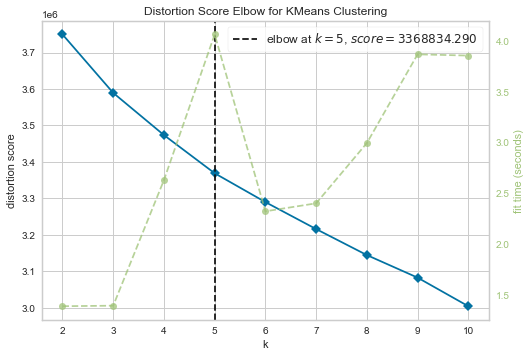

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
model = KMeans(random_state=1)

elb_visualizer_nsal = KElbowVisualizer(model, k = (2, 11))
elb_visualizer_nsal.fit(df_nsa_scaled1)
elb_visualizer_nsal.show()

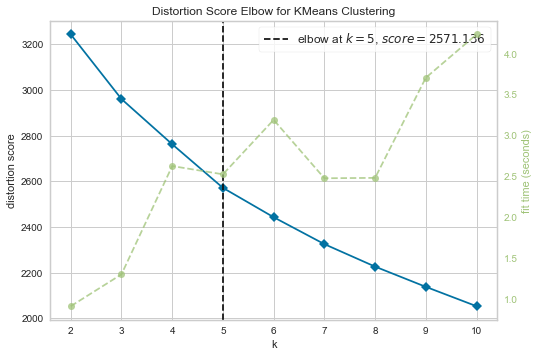

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model = KMeans(random_state=1)

elb_visualizer_nsal2 = KElbowVisualizer(model, k = (2, 11))
elb_visualizer_nsal2.fit(df_nsa_scaled2)
elb_visualizer_nsal2.show()

## Find the Optimal Number of Clusters (Silhouette analysis)

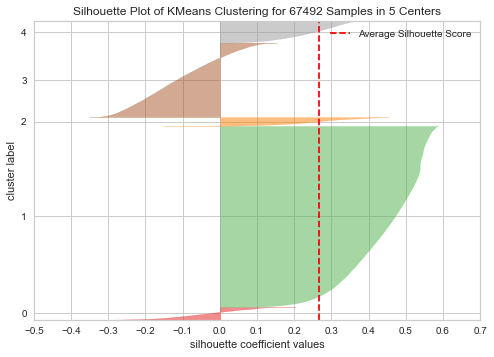

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 67492 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
model_4clust = KMeans(n_clusters = 5, random_state=1)

sil_visualizer_nsa3 = SilhouetteVisualizer(model_4clust)
sil_visualizer_nsa3.fit(df_nsa_scaled2)
sil_visualizer_nsa3.show()

# Perform K-Means Clustering with Optimal K

In [15]:
# append cluster assignments to original df

df_nsa_cat = df_nsa_pivot
df_nsa_cat['cluster'] = sil_visualizer_nsa3.labels_
df_nsa_cat.head()

,actorId,assigned_Page,assigned_elearn,attempted_elearn,completed_Certificate upload,completed_Checklist,completed_Document,completed_External Link,completed_Page,completed_Portal Page,...,suspended_elearn,terminated_elearn,unregistered_Certificate upload,unregistered_Checklist,unregistered_Page,unregistered_Portal Page,unregistered_elearn,updated_interaction,viewed_results,cluster
0,12.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,15.0,1
1,18.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,1
2,23.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,25.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1
4,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1


## Social Group

### Clustering with Action Features

/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/70640522.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nsas_new['occurence'] = 1


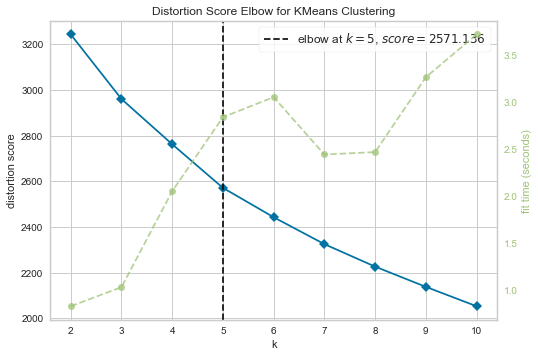

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# select social group
df_new_starter_action_social = df_new_starter_action[df_new_starter_action['social'] == True]

# verb count
vc = df_new_starter_action_social['action'].value_counts()

# select verb frequency over 100 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_new_starter_action_social_filter = df_new_starter_action_social[df_new_starter_action_social['action'].isin(vc_list)]
df_nsas_new = df_new_starter_action_filter
df_nsas_new['occurence'] = 1

# generate pivot table
df_nsas_pivot = pd.pivot_table(df_nsas_new, values = 'occurence', index='actorId', columns='action', aggfunc='count')

# convert pivot table to df
df_nsas_pivot = df_nsas_pivot.reset_index()

# remove index header
df_nsas_pivot = df_nsas_pivot.rename_axis(None, axis = 1)

# replace Nan with 0 for an entire dataframe
df_nsas_pivot = df_nsas_pivot.replace(np.nan, 0)

# generate df without actorId
df_nsas_noid = df_nsas_pivot.loc[:, df_nsas_pivot.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_nsas_scaled = pd.DataFrame(scaler.fit_transform(df_nsas_noid), columns=df_nsas_noid.columns)

# plot elbow chart 
model = KMeans(random_state=1)

elb_visualizer_nsas_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_nsas_eb.fit(df_nsas_scaled)
elb_visualizer_nsas_eb.show()

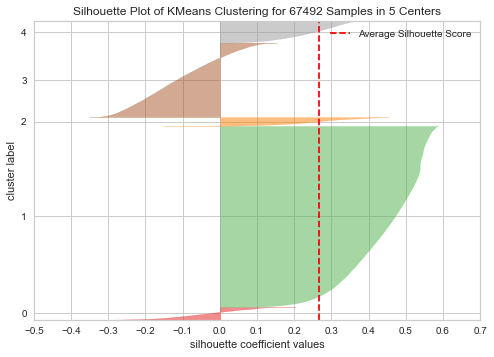

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 67492 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
model_4clust = KMeans(n_clusters=5, random_state=1)

sil_visualizer_nsas_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_nsas_sh.fit(df_nsas_scaled)
sil_visualizer_nsas_sh.show()

In [18]:
df_nsas_cat = df_nsas_pivot
df_nsas_cat['cluster'] = sil_visualizer_nsas_sh.labels_
df_nsas_cat.head()

,actorId,assigned_Page,assigned_elearn,attempted_elearn,completed_Certificate upload,completed_Checklist,completed_Document,completed_External Link,completed_Page,completed_Portal Page,...,suspended_elearn,terminated_elearn,unregistered_Certificate upload,unregistered_Checklist,unregistered_Page,unregistered_Portal Page,unregistered_elearn,updated_interaction,viewed_results,cluster
0,12.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,15.0,1
1,18.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,1
2,23.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,25.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1
4,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1


In [19]:
df_nsas_summary = df_nsas_cat.groupby("cluster").mean().round()
df_nsas_summary['count'] = df_nsas_cat.groupby("cluster").size()
df_nsas_summary

,actorId,assigned_Page,assigned_elearn,attempted_elearn,completed_Certificate upload,completed_Checklist,completed_Document,completed_External Link,completed_Page,completed_Portal Page,...,suspended_elearn,terminated_elearn,unregistered_Certificate upload,unregistered_Checklist,unregistered_Page,unregistered_Portal Page,unregistered_elearn,updated_interaction,viewed_results,count
cluster,,,,,,,,,,,,,,,,,,,,,
0,107907.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,100.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,2882
1,109112.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,40889
2,109033.0,0.0,0.0,0.0,0.0,4.0,29.0,0.0,21.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,1995
3,122519.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,16.0,0.0,...,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,16810
4,94997.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,13.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,4916


### Evaluation

In [20]:
import sklearn.metrics as sm

# accuracy score

### Social Clusters - Visualisations

In [21]:
df_nsas_cat_vis = df_nsas_cat.drop(columns={'actorId'})
df_nsas_cat_vis = df_nsas_cat_vis.groupby('cluster').sum()
social_columns = df_nsas_cat_vis.columns.tolist()
df_nsas_cat_vis['cluster'] = [0, 1, 2, 3, 4]
df_nsas_cat_vis

,assigned_Page,assigned_elearn,attempted_elearn,completed_Certificate upload,completed_Checklist,completed_Document,completed_External Link,completed_Page,completed_Portal Page,completed_Video,...,suspended_elearn,terminated_elearn,unregistered_Certificate upload,unregistered_Checklist,unregistered_Page,unregistered_Portal Page,unregistered_elearn,updated_interaction,viewed_results,cluster
cluster,,,,,,,,,,,,,,,,,,,,,
0,76.0,165.0,144.0,2950.0,8022.0,592.0,715.0,287830.0,785.0,11448.0,...,1670.0,10381.0,130.0,74.0,260.0,70.0,448.0,418.0,50003.0,0
1,9.0,20.0,17.0,3575.0,93124.0,509.0,278.0,310207.0,1929.0,195329.0,...,19552.0,89571.0,261.0,108.0,787.0,175.0,751.0,2381.0,210842.0,1
2,20.0,139.0,0.0,66.0,8133.0,56986.0,50.0,41604.0,829.0,54476.0,...,1597.0,6537.0,68.0,31.0,241.0,83.0,127.0,279.0,35865.0,2
3,19.0,68.0,4.0,3317.0,62744.0,1165.0,457.0,264430.0,5544.0,220901.0,...,30953.0,55670.0,474.0,245.0,1693.0,364.0,1530.0,3752.0,252522.0,3
4,1.0,0.0,10.0,1235.0,19090.0,491.0,91.0,65081.0,1263.0,43206.0,...,4624.0,17295.0,81.0,51.0,271.0,83.0,391.0,873.0,52801.0,4


In [22]:
# 5 clusters
df_nsas_cat_c0 = df_nsas_cat[df_nsas_cat['cluster'] == 0]
df_nsas_cat_c1 = df_nsas_cat[df_nsas_cat['cluster'] == 1]
df_nsas_cat_c2 = df_nsas_cat[df_nsas_cat['cluster'] == 2]
df_nsas_cat_c3 = df_nsas_cat[df_nsas_cat['cluster'] == 3]
df_nsas_cat_c4 = df_nsas_cat[df_nsas_cat['cluster'] == 4]

#### Cluster 0

In [23]:
df_nsas_cat_c0_vis = df_nsas_cat_c0.drop(columns=['actorId', 'cluster'])
df_social_c0_action = df_nsas_cat_c0_vis.sum(axis=0)
df_social_c0_action = df_social_c0_action.to_frame(name = "Count of Action")
df_social_c0_action = df_social_c0_action.sort_values('Count of Action', ascending=False)
df_social_c0_action

,Count of Action
completed_Page,287830.0
completed_elearn,157163.0
experienced_learning,142385.0
passed_elearn,79136.0
viewed_results,50003.0
searched_search-engine,45204.0
rated_Page,44399.0
rated_elearn,38272.0
experienced_notifications,21901.0
experienced_profile,21668.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/2021006684.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_social_c0_action.index, rotation = 90)


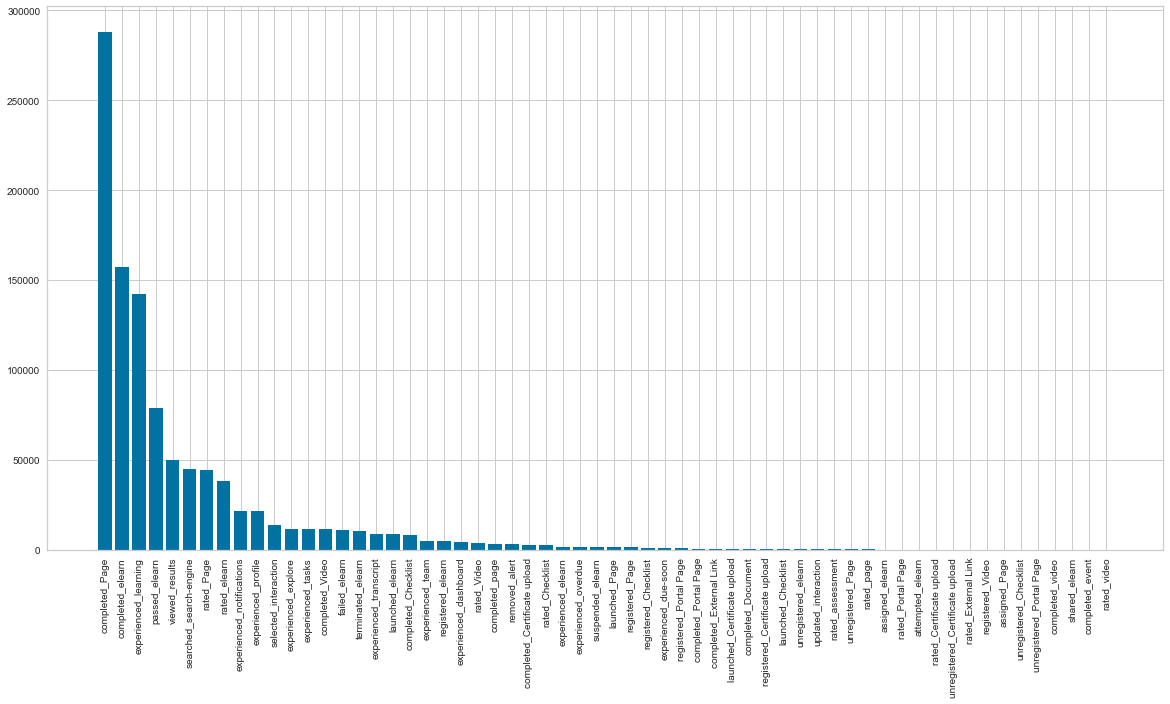

In [24]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_social_c0_action.index, df_social_c0_action['Count of Action'])
ax.set_xticklabels(df_social_c0_action.index, rotation = 90)
plt.show()

#### Cluster 1

In [25]:
df_nsas_cat_c1_vis = df_nsas_cat_c1.drop(columns=['actorId', 'cluster'])
df_social_c1_action = df_nsas_cat_c1_vis.sum(axis=0)
df_social_c1_action = df_social_c1_action.to_frame(name = "Count of Action")
df_social_c1_action = df_social_c1_action.sort_values('Count of Action', ascending=False)
df_social_c1_action

,Count of Action
experienced_learning,667034.0
completed_elearn,428969.0
completed_Page,310207.0
passed_elearn,229354.0
viewed_results,210842.0
completed_Video,195329.0
searched_search-engine,195220.0
rated_elearn,134307.0
experienced_notifications,124612.0
experienced_profile,108970.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_4652/3042051549.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_social_c1_action.index, rotation = 90)


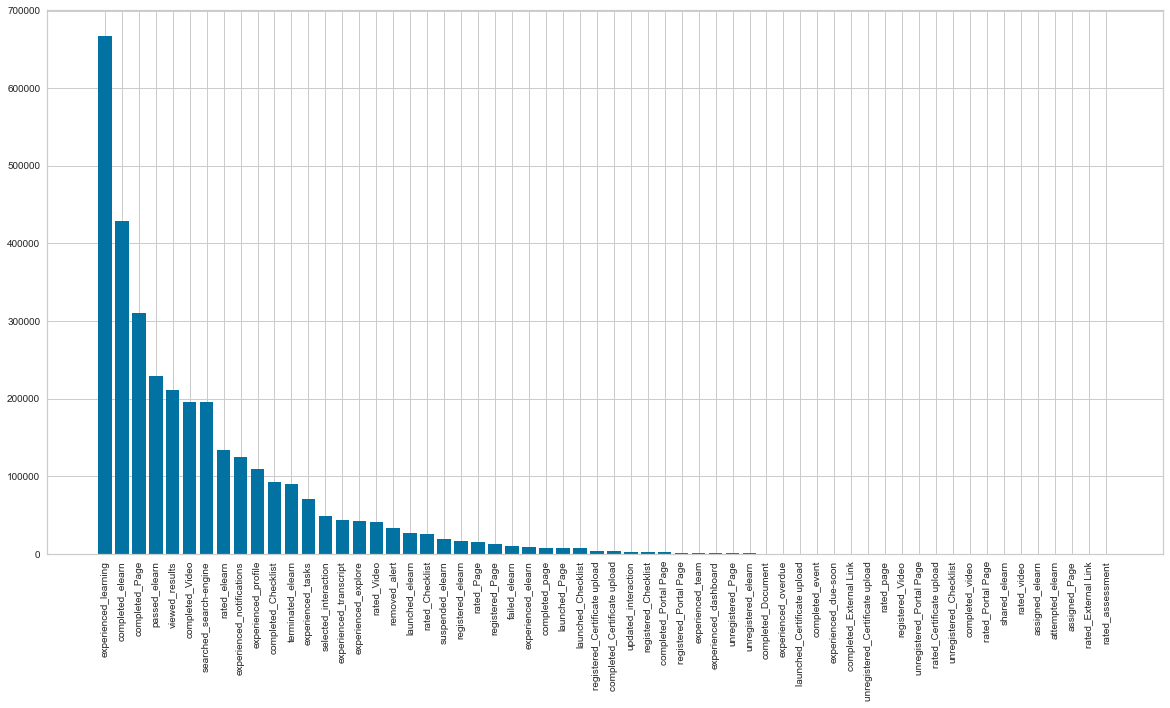

In [120]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_social_c1_action.index, df_social_c1_action['Count of Action'])
ax.set_xticklabels(df_social_c1_action.index, rotation = 90)
plt.show()

#### Cluster 2

In [26]:
df_nsas_cat_c2_vis = df_nsas_cat_c2.drop(columns=['actorId', 'cluster'])
df_social_c2_action = df_nsas_cat_c2_vis.sum(axis=0)
df_social_c2_action = df_social_c2_action.to_frame(name = "Count of Action")
df_social_c2_action = df_social_c2_action.sort_values('Count of Action', ascending=False)
df_social_c2_action

,Count of Action
experienced_learning,62538.0
completed_Document,56986.0
completed_Video,54476.0
completed_Page,41604.0
completed_elearn,36019.0
viewed_results,35865.0
searched_search-engine,33512.0
passed_elearn,19672.0
rated_elearn,18296.0
experienced_notifications,12255.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/3956968032.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_social_c2_action.index, rotation = 90)


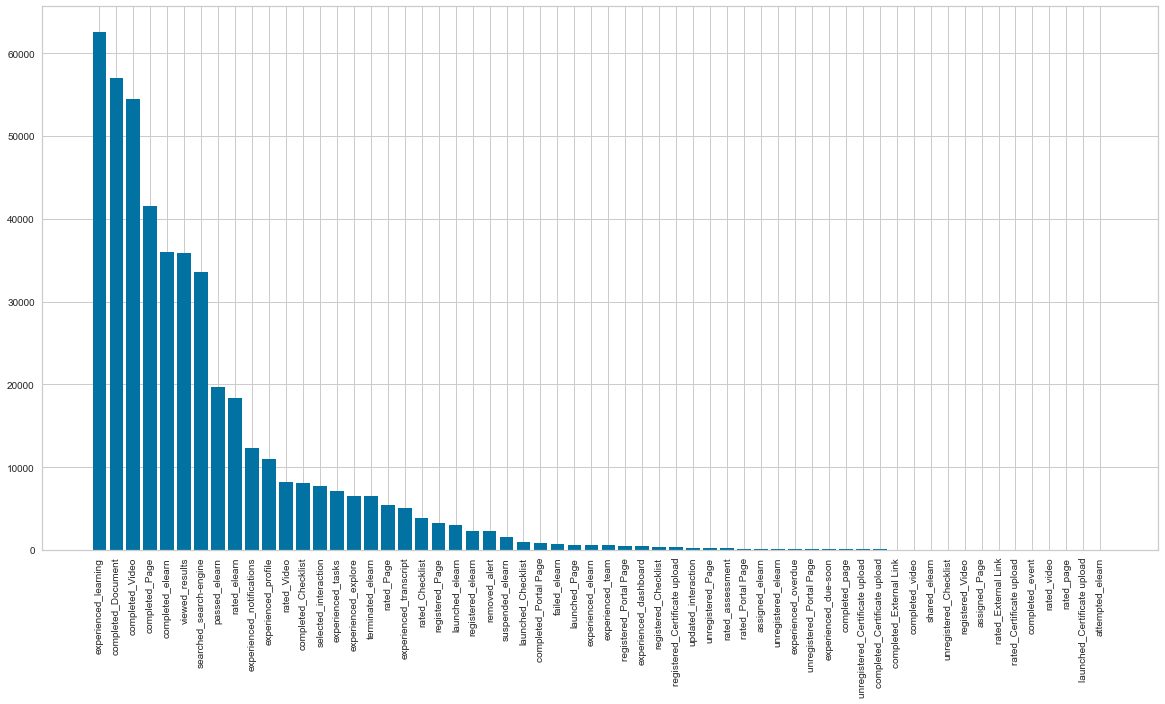

In [27]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_social_c2_action.index, df_social_c2_action['Count of Action'])
ax.set_xticklabels(df_social_c2_action.index, rotation = 90)
plt.show()

#### Cluster 3

In [28]:
df_nsas_cat_c3_vis = df_nsas_cat_c3.drop(columns=['actorId', 'cluster'])
df_social_c3_action = df_nsas_cat_c3_vis.sum(axis=0)
df_social_c3_action = df_social_c3_action.to_frame(name = "Count of Action")
df_social_c3_action = df_social_c3_action.sort_values('Count of Action', ascending=False)
df_social_c3_action

,Count of Action
experienced_learning,576046.0
completed_elearn,342200.0
completed_Page,264430.0
viewed_results,252522.0
rated_elearn,248991.0
searched_search-engine,228386.0
completed_Video,220901.0
passed_elearn,201492.0
experienced_notifications,136069.0
experienced_profile,117310.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/3343635542.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_social_c3_action.index, rotation = 90)


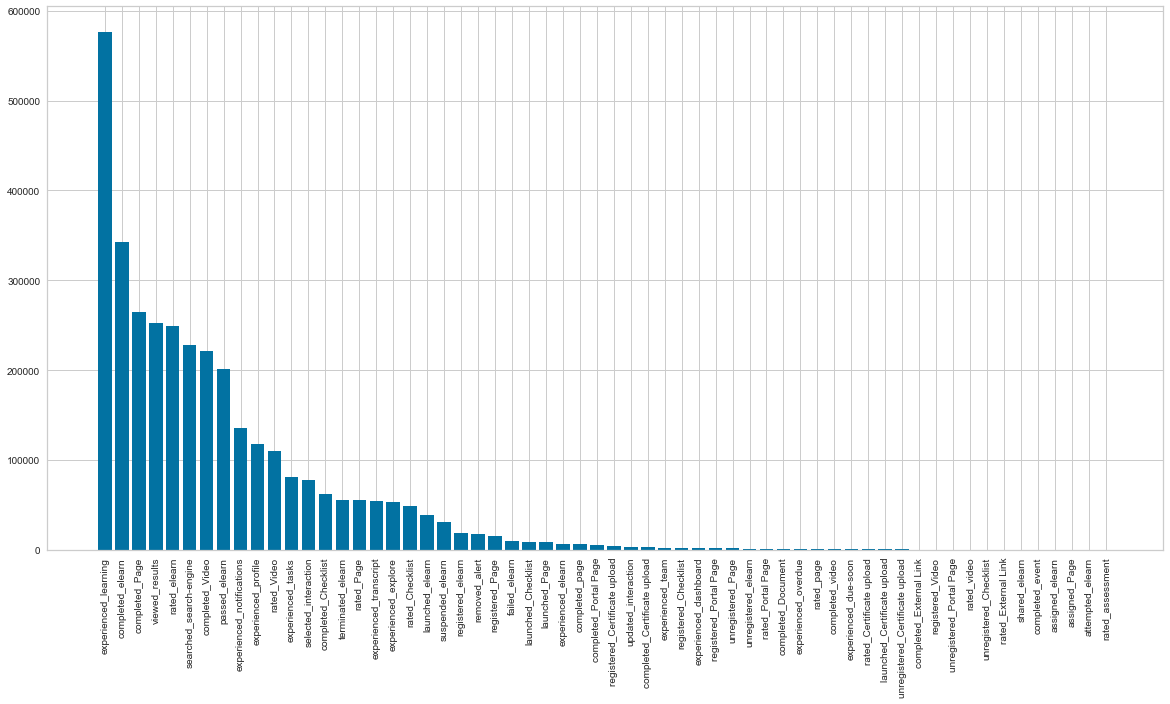

In [29]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_social_c3_action.index, df_social_c3_action['Count of Action'])
ax.set_xticklabels(df_social_c3_action.index, rotation = 90)
plt.show()

#### Cluster 4

In [30]:
df_nsas_cat_c4_vis = df_nsas_cat_c4.drop(columns=['actorId', 'cluster'])
df_social_c4_action = df_nsas_cat_c4_vis.sum(axis=0)
df_social_c4_action = df_social_c4_action.to_frame(name = "Count of Action")
df_social_c4_action = df_social_c4_action.sort_values('Count of Action', ascending=False)
df_social_c4_action

,Count of Action
experienced_learning,149155.0
completed_elearn,93975.0
rated_elearn,75052.0
completed_Page,65081.0
viewed_results,52801.0
passed_elearn,51306.0
searched_search-engine,48450.0
completed_Video,43206.0
experienced_notifications,29728.0
experienced_profile,26468.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/2878184600.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_social_c4_action.index, rotation = 90)


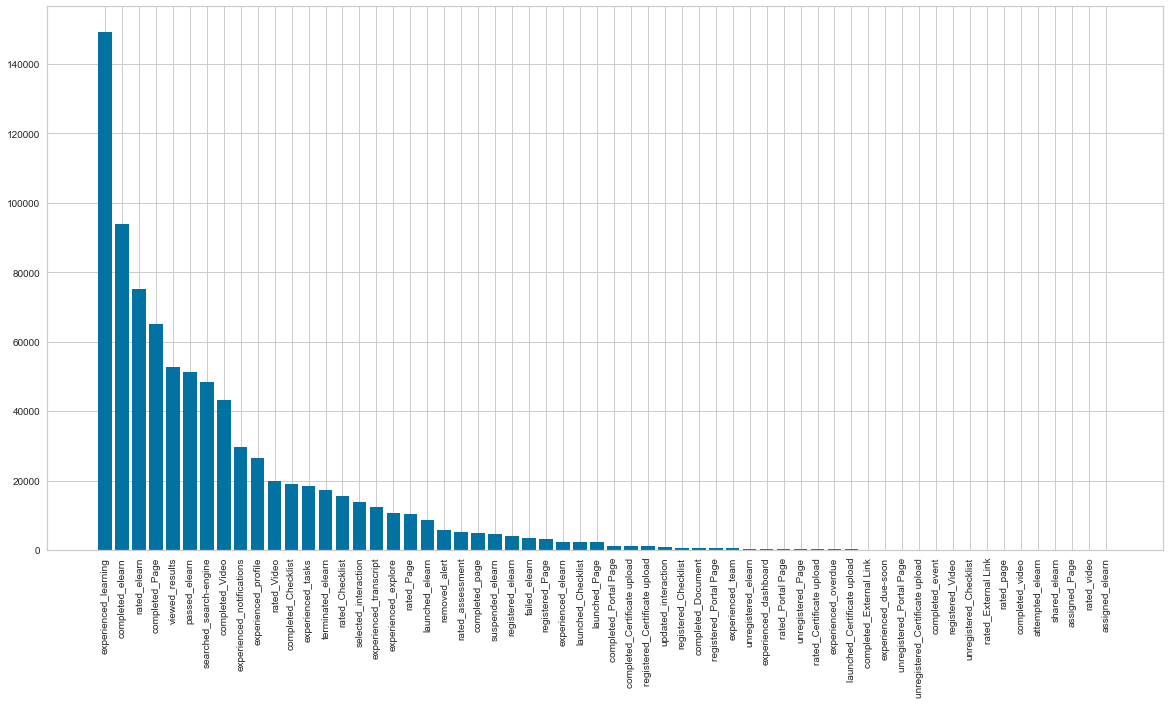

In [31]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_social_c4_action.index, df_social_c4_action['Count of Action'])
ax.set_xticklabels(df_social_c4_action.index, rotation = 90)
plt.show()

#### Clusters together

In [32]:
df_social_action = df_social_c0_action.rename(columns={'Count of Action': 'count_c0'})
df_social_action = pd.concat([df_social_action, df_social_c1_action], axis=1)
df_social_action = df_social_action.rename(columns={'Count of Action': 'count_c1'})
df_social_action = pd.concat([df_social_action, df_social_c2_action], axis=1)
df_social_action = df_social_action.rename(columns={'Count of Action': 'count_c2'})
df_social_action = pd.concat([df_social_action, df_social_c3_action], axis=1)
df_social_action = df_social_action.rename(columns={'Count of Action': 'count_c3'})
df_social_action = pd.concat([df_social_action, df_social_c4_action], axis=1)
df_social_action = df_social_action.rename(columns={'Count of Action': 'count_c4'})
df_social_action = df_social_action.loc[(df_social_action['count_c0'] >= 1000) & (df_social_action['count_c1'] >= 1000) & (df_social_action['count_c2'] >= 1000) & (df_social_action['count_c3'] >= 1000) & (df_social_action['count_c4'] >= 1000)]
df_social_action

,count_c0,count_c1,count_c2,count_c3,count_c4
completed_Page,287830.0,310207.0,41604.0,264430.0,65081.0
completed_elearn,157163.0,428969.0,36019.0,342200.0,93975.0
experienced_learning,142385.0,667034.0,62538.0,576046.0,149155.0
passed_elearn,79136.0,229354.0,19672.0,201492.0,51306.0
viewed_results,50003.0,210842.0,35865.0,252522.0,52801.0
searched_search-engine,45204.0,195220.0,33512.0,228386.0,48450.0
rated_Page,44399.0,15529.0,5474.0,55478.0,10340.0
rated_elearn,38272.0,134307.0,18296.0,248991.0,75052.0
experienced_notifications,21901.0,124612.0,12255.0,136069.0,29728.0
experienced_profile,21668.0,108970.0,10984.0,117310.0,26468.0


#### Grouped bar chart

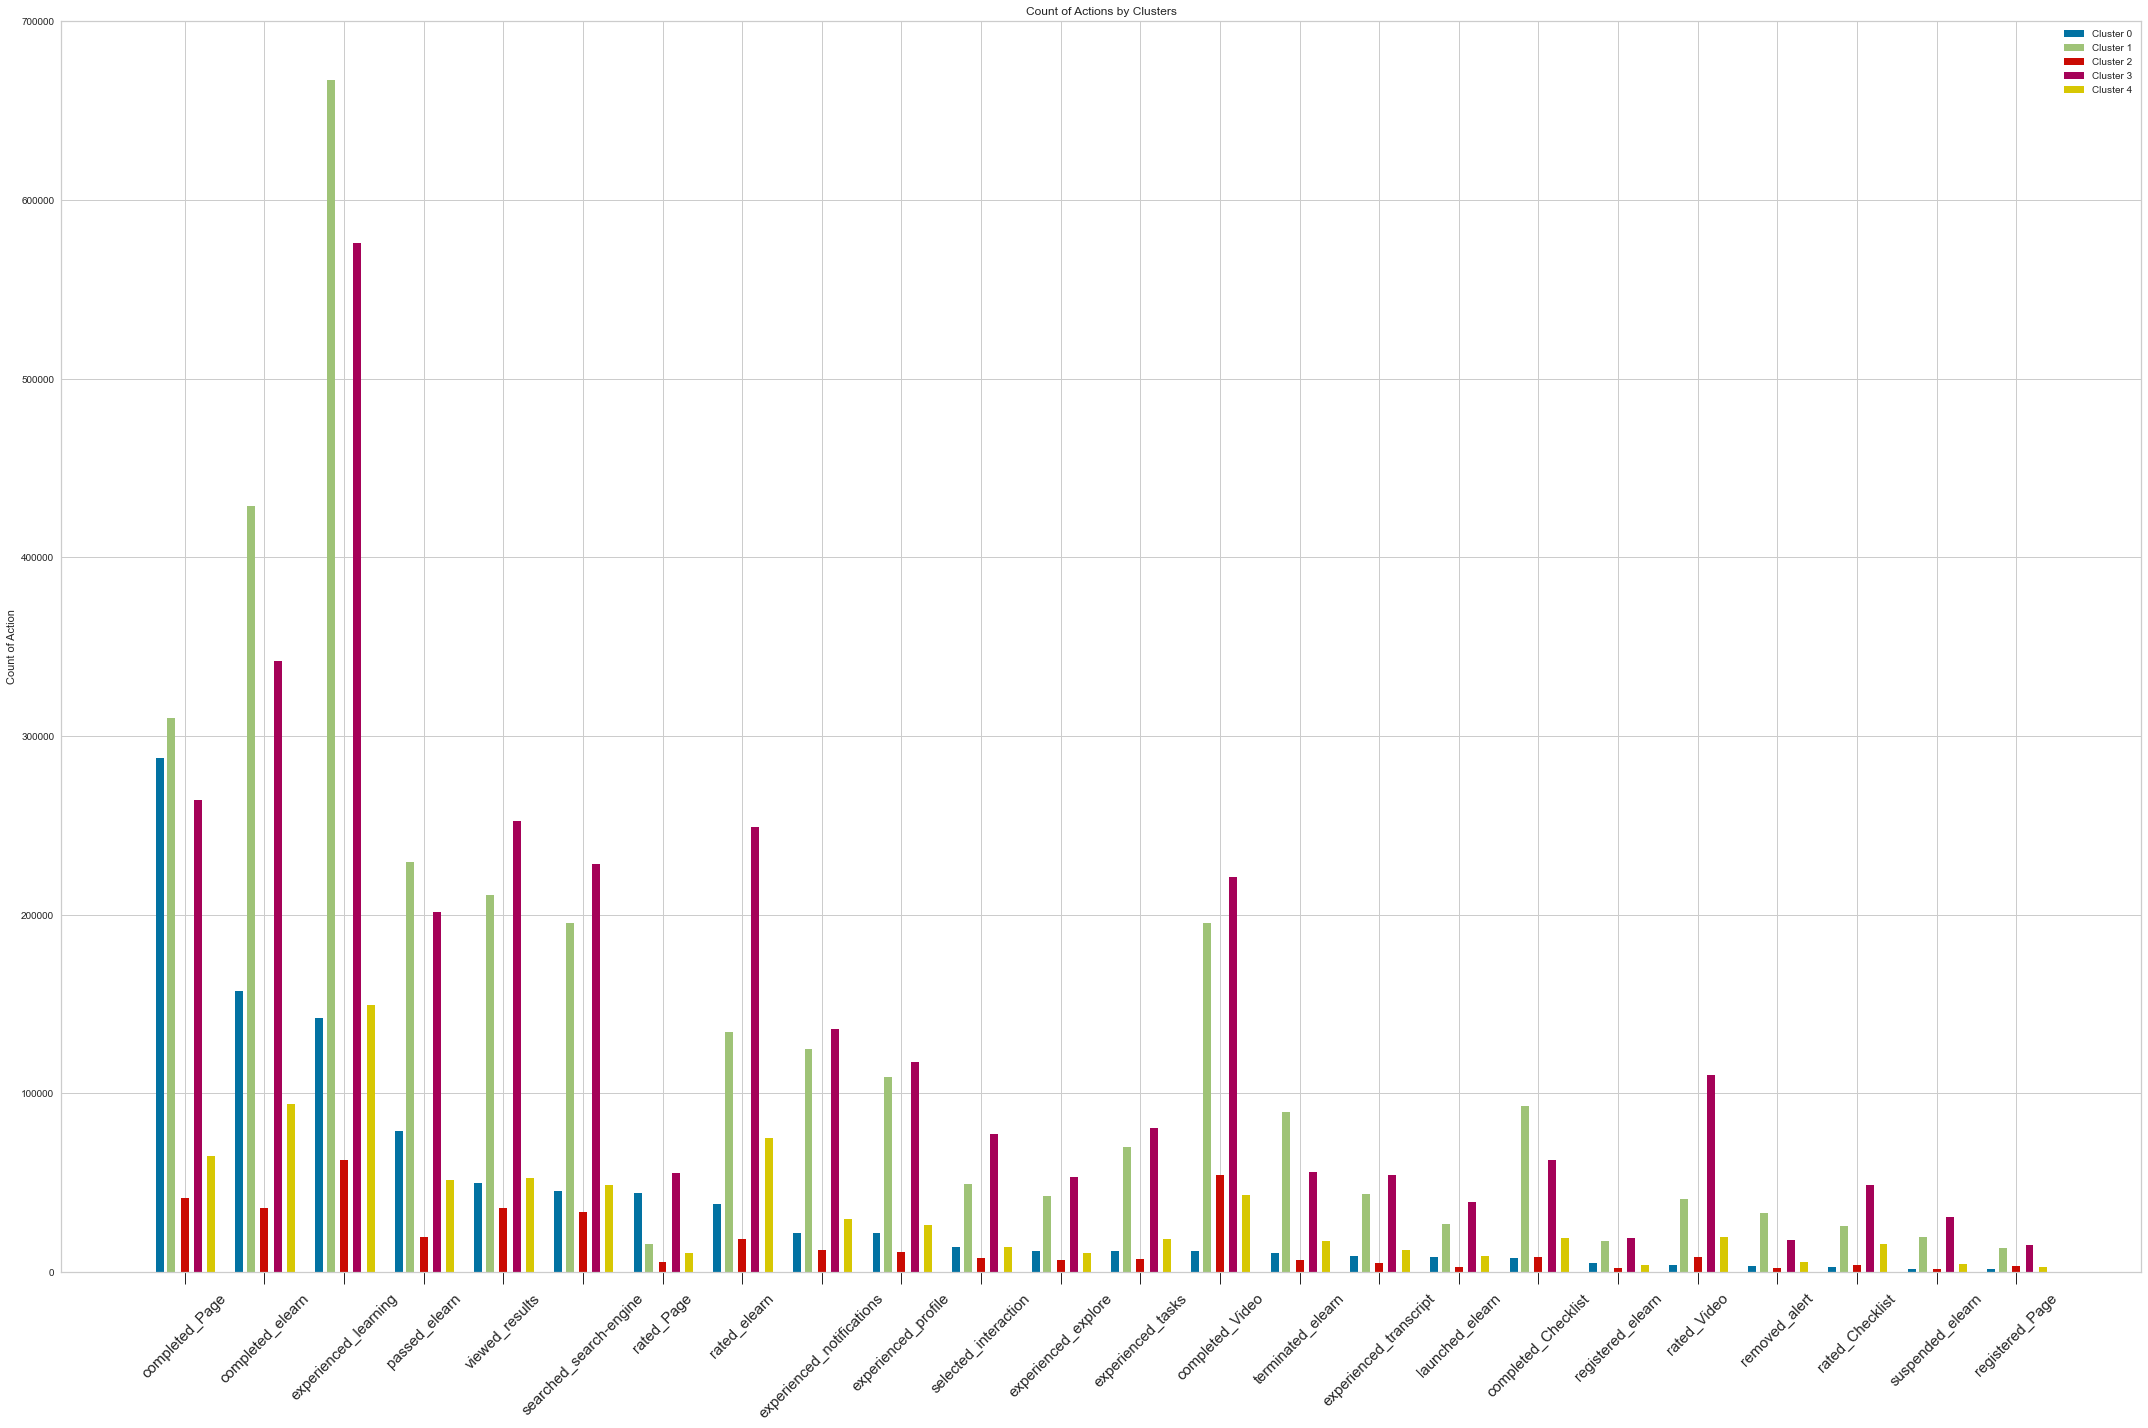

In [33]:
labels = df_social_action.index
x = np.arange(len(labels))
width_1 = 5
width_2 = 0.1

fig, ax = plt.subplots(figsize = (30,20))
r1 = ax.bar(x - width_1/16, df_social_action['count_c0'], width_2, label = 'Cluster 0')
r2 = ax.bar(x - width_1/30, df_social_action['count_c1'], width_2, label = 'Cluster 1')
r3 = ax.bar(x, df_social_action['count_c2'], width_2, label = 'Cluster 2')
r4 = ax.bar(x + width_1/30, df_social_action['count_c3'], width_2, label = 'Cluster 3')
r5 = ax.bar(x + width_1/15, df_social_action['count_c4'], width_2, label = 'Cluster 4')

ax.set_ylabel('Count of Action')
ax.set_title('Count of Actions by Clusters')
ax.set_xticks(x, labels, rotation = 45, fontsize = 15)
ax.tick_params(axis = 'x', which = 'major', length = 12)
ax.legend()

fig.tight_layout()

plt.show()

In [34]:
df_social_action_2 = df_social_c0_action.rename(columns={'Count of Action': 'count_c0'})
df_social_action_2 = pd.concat([df_social_action_2, df_social_c1_action], axis=1)
df_social_action_2 = df_social_action_2.rename(columns={'Count of Action': 'count_c1'})
df_social_action_2 = pd.concat([df_social_action_2, df_social_c2_action], axis=1)
df_social_action_2 = df_social_action_2.rename(columns={'Count of Action': 'count_c2'})
df_social_action_2 = pd.concat([df_social_action_2, df_social_c3_action], axis=1)
df_social_action_2 = df_social_action_2.rename(columns={'Count of Action': 'count_c3'})
df_social_action_2 = pd.concat([df_social_action_2, df_social_c4_action], axis=1)
df_social_action_2 = df_social_action_2.rename(columns={'Count of Action': 'count_c4'})
df_social_action_2 = df_social_action_2.loc[(df_social_action_2['count_c0'] >= 5000) & (df_social_action_2['count_c1'] >= 5000) & (df_social_action_2['count_c2'] >= 5000) & (df_social_action_2['count_c3'] >= 5000) & (df_social_action_2['count_c4'] >= 5000)]
df_social_action_2

,count_c0,count_c1,count_c2,count_c3,count_c4
completed_Page,287830.0,310207.0,41604.0,264430.0,65081.0
completed_elearn,157163.0,428969.0,36019.0,342200.0,93975.0
experienced_learning,142385.0,667034.0,62538.0,576046.0,149155.0
passed_elearn,79136.0,229354.0,19672.0,201492.0,51306.0
viewed_results,50003.0,210842.0,35865.0,252522.0,52801.0
searched_search-engine,45204.0,195220.0,33512.0,228386.0,48450.0
rated_Page,44399.0,15529.0,5474.0,55478.0,10340.0
rated_elearn,38272.0,134307.0,18296.0,248991.0,75052.0
experienced_notifications,21901.0,124612.0,12255.0,136069.0,29728.0
experienced_profile,21668.0,108970.0,10984.0,117310.0,26468.0


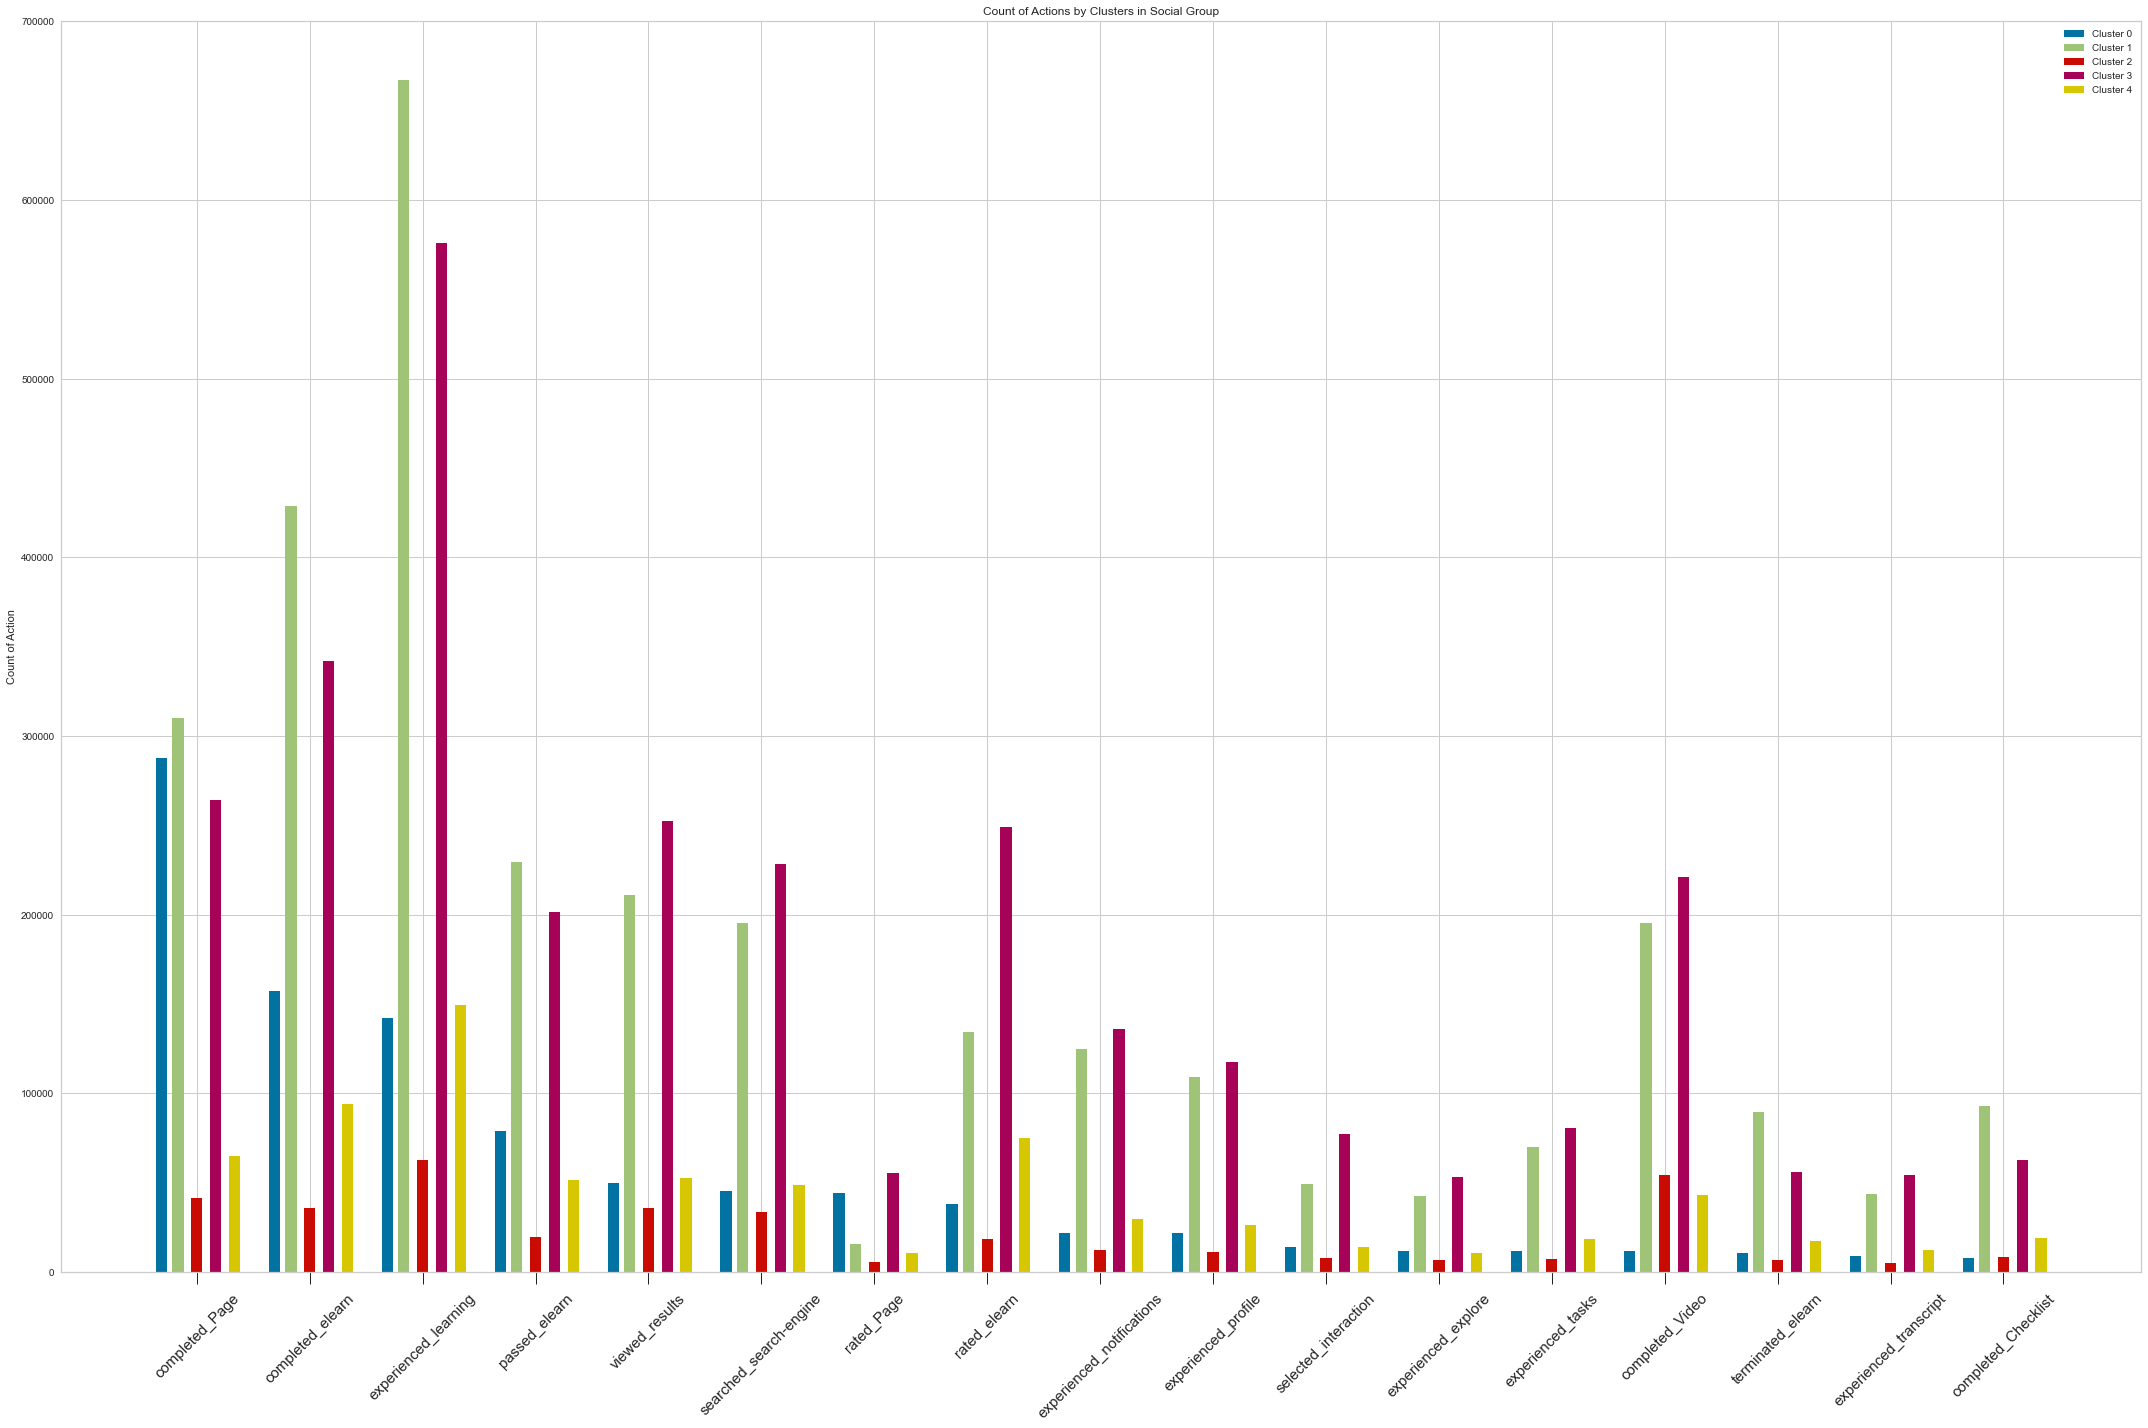

In [60]:
labels = df_social_action_2.index
x = np.arange(len(labels))
width_1 = 5
width_2 = 0.1

fig, ax = plt.subplots(figsize = (30,20))
r1 = ax.bar(x - width_1/16, df_social_action_2['count_c0'], width_2, label = 'Cluster 0')
r2 = ax.bar(x - width_1/30, df_social_action_2['count_c1'], width_2, label = 'Cluster 1')
r3 = ax.bar(x, df_social_action_2['count_c2'], width_2, label = 'Cluster 2')
r4 = ax.bar(x + width_1/30, df_social_action_2['count_c3'], width_2, label = 'Cluster 3')
r5 = ax.bar(x + width_1/15, df_social_action_2['count_c4'], width_2, label = 'Cluster 4')

ax.set_ylabel('Count of Action')
ax.set_title('Count of Actions by Clusters in Social Group')
ax.set_xticks(x, labels, rotation = 45, fontsize = 15)
ax.tick_params(axis = 'x', which = 'major', length = 12)
ax.legend()

fig.tight_layout()

plt.show()

# Exploring Group

### Clustering with Action Features

/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/3304809379.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nsae_new['occurence'] = 1


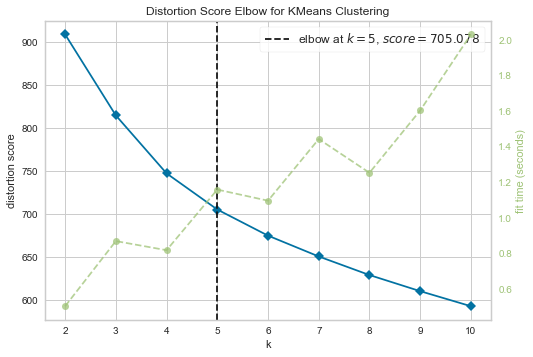

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# select social group
df_new_starter_action_exploring = df_new_starter_action[df_new_starter_action['exploring'] == True]

# verb count
vc = df_new_starter_action_exploring['action'].value_counts()

# select verb frequency over 100 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_new_starter_action_exploring_filter = df_new_starter_action_exploring[df_new_starter_action_exploring['action'].isin(vc_list)]
df_nsae_new = df_new_starter_action_exploring_filter
df_nsae_new['occurence'] = 1

# generate pivot table
df_nsae_pivot = pd.pivot_table(df_nsae_new, values = 'occurence', index='actorId', columns='action', aggfunc='count')

# convert pivot table to df
df_nsae_pivot = df_nsae_pivot.reset_index()

# remove index header
df_nsae_pivot = df_nsae_pivot.rename_axis(None, axis = 1)

# replace Nan with 0 for an entire dataframe
df_nsae_pivot = df_nsae_pivot.replace(np.nan, 0)

# generate df without actorId
df_nsae_noid = df_nsae_pivot.loc[:, df_nsae_pivot.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_nsae_scaled = pd.DataFrame(scaler.fit_transform(df_nsae_noid), columns=df_nsae_noid.columns)

# plot elbow chart 
model = KMeans(random_state=1)

elb_visualizer_nsae_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_nsae_eb.fit(df_nsae_scaled)
elb_visualizer_nsae_eb.show()

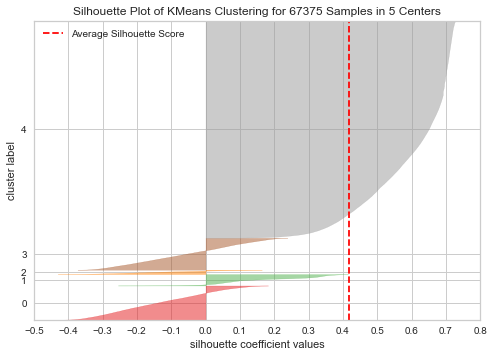

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 67375 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
model_4clust = KMeans(n_clusters=5, random_state=1)

sil_visualizer_nsae_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_nsae_sh.fit(df_nsae_scaled)
sil_visualizer_nsae_sh.show()

In [38]:
df_nsae_cat = df_nsae_pivot
df_nsae_cat['cluster'] = sil_visualizer_nsae_sh.labels_
df_nsae_cat.head()

,actorId,assigned_Page,assigned_elearn,attempted_elearn,completed_Certificate upload,experienced_dashboard,experienced_elearn,experienced_explore,experienced_learning,experienced_profile,...,registered_Checklist,registered_Page,registered_Portal Page,registered_Video,registered_elearn,searched_search-engine,selected_interaction,updated_interaction,viewed_results,cluster
0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,26.0,2.0,...,0.0,5.0,0.0,0.0,9.0,8.0,11.0,0.0,15.0,3
1,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,2.0,...,0.0,0.0,2.0,0.0,0.0,8.0,0.0,1.0,8.0,4
2,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,25.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4
4,26.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,2.0,6.0,0.0,0.0,6.0,4


In [39]:
df_nsae_summary = df_nsae_cat.groupby("cluster").mean().round()
df_nsae_summary['count'] = df_nsae_cat.groupby("cluster").size()
df_nsae_summary

,actorId,assigned_Page,assigned_elearn,attempted_elearn,completed_Certificate upload,experienced_dashboard,experienced_elearn,experienced_explore,experienced_learning,experienced_profile,...,registered_Checklist,registered_Page,registered_Portal Page,registered_Video,registered_elearn,searched_search-engine,selected_interaction,updated_interaction,viewed_results,count
cluster,,,,,,,,,,,,,,,,,,,,,
0,110226.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,51.0,13.0,...,0.0,1.0,0.0,0.0,1.0,7.0,4.0,0.0,8.0,7728
1,111237.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,36.0,7.0,...,0.0,0.0,0.0,0.0,1.0,11.0,2.0,0.0,12.0,2560
2,105267.0,0.0,0.0,0.0,0.0,3.0,1.0,15.0,73.0,13.0,...,1.0,5.0,1.0,0.0,7.0,99.0,36.0,0.0,109.0,974
3,106724.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,31.0,5.0,...,0.0,2.0,0.0,0.0,2.0,32.0,8.0,0.0,34.0,7184
4,112503.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.0,3.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,3.0,48929


### Exploring clusters - Visualisations

In [40]:
# 5 clusters
df_nsae_cat_c0 = df_nsae_cat[df_nsae_cat['cluster'] == 0]
df_nsae_cat_c1 = df_nsae_cat[df_nsae_cat['cluster'] == 1]
df_nsae_cat_c2 = df_nsae_cat[df_nsae_cat['cluster'] == 2]
df_nsae_cat_c3 = df_nsae_cat[df_nsae_cat['cluster'] == 3]
df_nsae_cat_c4 = df_nsae_cat[df_nsae_cat['cluster'] == 4]

#### Cluster 0

In [48]:
df_nsae_cat_c0_vis = df_nsae_cat_c0.drop(columns=['actorId', 'cluster'])
df_exploring_c0_action = df_nsae_cat_c0_vis.sum(axis=0)
df_exploring_c0_action = df_exploring_c0_action.to_frame(name = "Count of Action")
df_exploring_c0_action = df_exploring_c0_action.sort_values('Count of Action', ascending=False)
df_exploring_c0_action.head()

,Count of Action
experienced_learning,392318.0
passed_elearn,136836.0
experienced_profile,98047.0
experienced_tasks,71385.0
viewed_results,64399.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/3281351919.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_exploring_c0_action.index, rotation = 90)


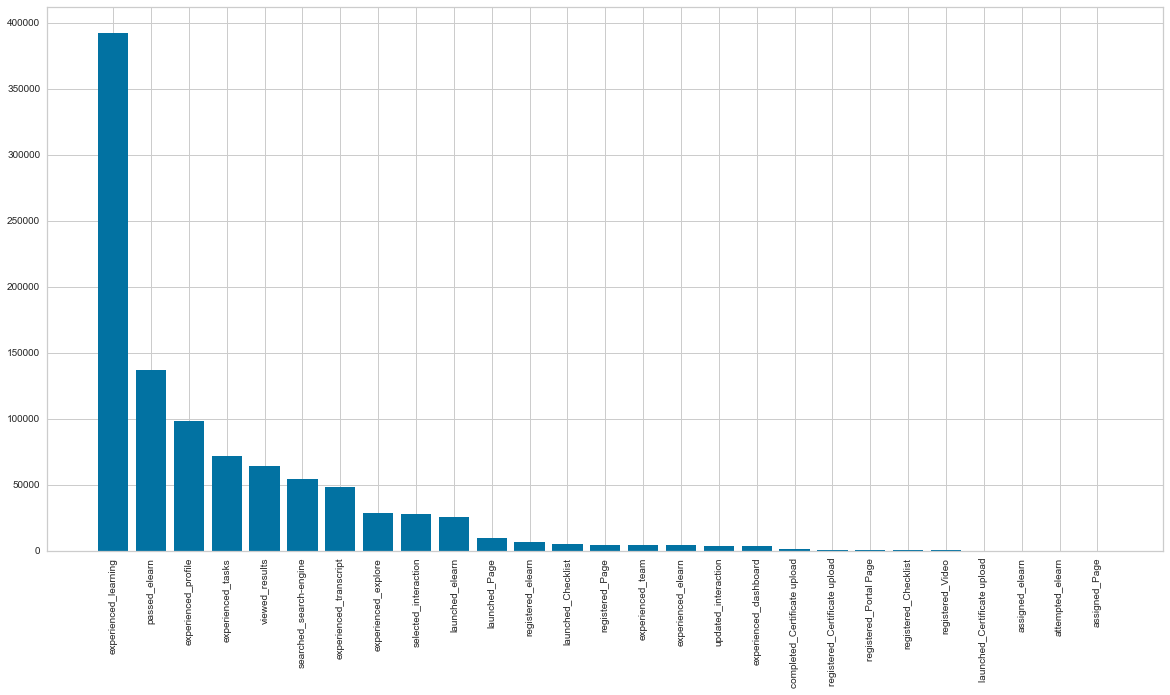

In [47]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_exploring_c0_action.index, df_exploring_c0_action['Count of Action'])
ax.set_xticklabels(df_exploring_c0_action.index, rotation = 90)
plt.show()

#### Cluster 1

In [49]:
df_nsae_cat_c1_vis = df_nsae_cat_c1.drop(columns=['actorId', 'cluster'])
df_exploring_c1_action = df_nsae_cat_c1_vis.sum(axis=0)
df_exploring_c1_action = df_exploring_c1_action.to_frame(name = "Count of Action")
df_exploring_c1_action = df_exploring_c1_action.sort_values('Count of Action', ascending=False)
df_exploring_c1_action.head()

,Count of Action
experienced_learning,91904.0
viewed_results,29832.0
passed_elearn,28592.0
searched_search-engine,27977.0
experienced_profile,16793.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/293808554.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_exploring_c1_action.index, rotation = 90)


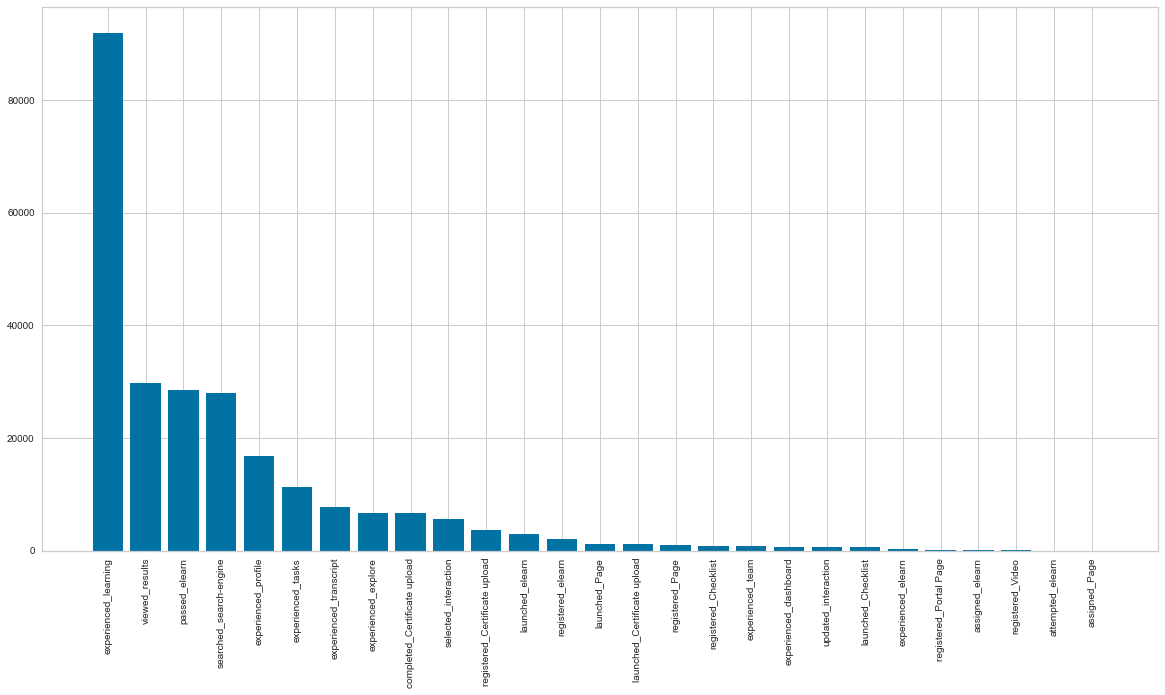

In [50]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_exploring_c1_action.index, df_exploring_c1_action['Count of Action'])
ax.set_xticklabels(df_exploring_c1_action.index, rotation = 90)
plt.show()

#### Cluster 2

In [51]:
df_nsae_cat_c2_vis = df_nsae_cat_c2.drop(columns=['actorId', 'cluster'])
df_exploring_c2_action = df_nsae_cat_c2_vis.sum(axis=0)
df_exploring_c2_action = df_exploring_c2_action.to_frame(name = "Count of Action")
df_exploring_c2_action = df_exploring_c2_action.sort_values('Count of Action', ascending=False)
df_exploring_c2_action.head()

,Count of Action
viewed_results,106049.0
searched_search-engine,96352.0
experienced_learning,71009.0
selected_interaction,34991.0
passed_elearn,18176.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/160524210.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_exploring_c2_action.index, rotation = 90)


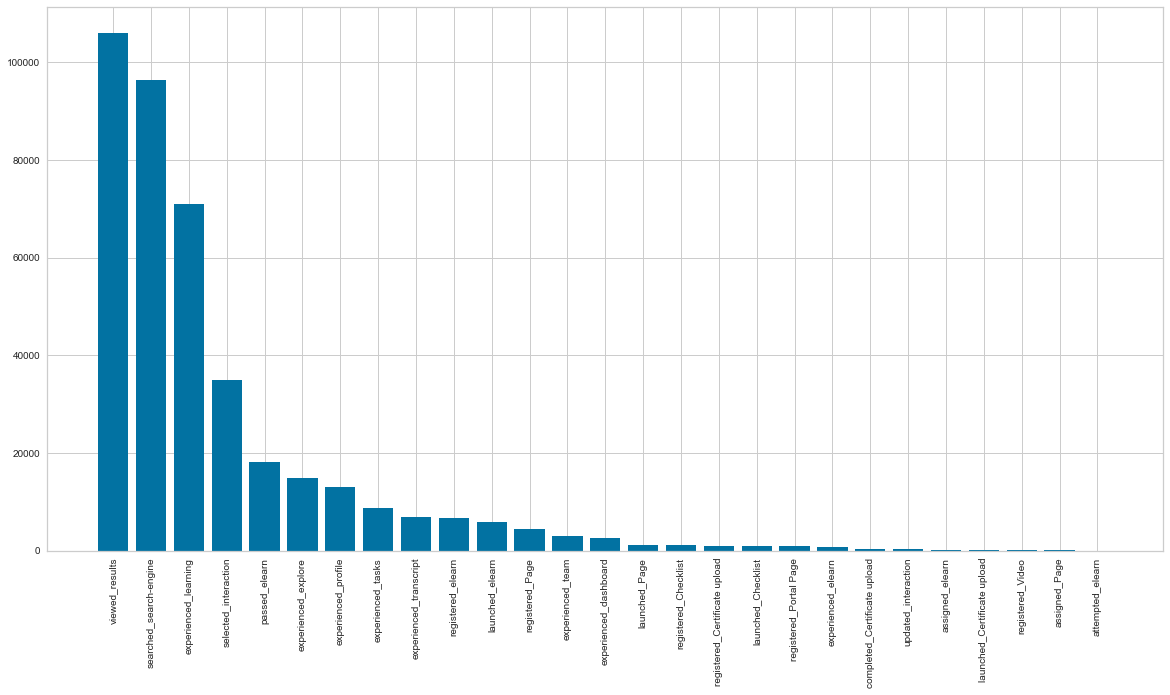

In [52]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_exploring_c2_action.index, df_exploring_c2_action['Count of Action'])
ax.set_xticklabels(df_exploring_c2_action.index, rotation = 90)
plt.show()

#### Cluster 3

In [53]:
df_nsae_cat_c3_vis = df_nsae_cat_c3.drop(columns=['actorId', 'cluster'])
df_exploring_c3_action = df_nsae_cat_c3_vis.sum(axis=0)
df_exploring_c3_action = df_exploring_c3_action.to_frame(name = "Count of Action")
df_exploring_c3_action = df_exploring_c3_action.sort_values('Count of Action', ascending=False)
df_exploring_c3_action.head()

,Count of Action
viewed_results,245114.0
searched_search-engine,227211.0
experienced_learning,223135.0
passed_elearn,79155.0
selected_interaction,57645.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/2538614793.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_exploring_c3_action.index, rotation = 90)


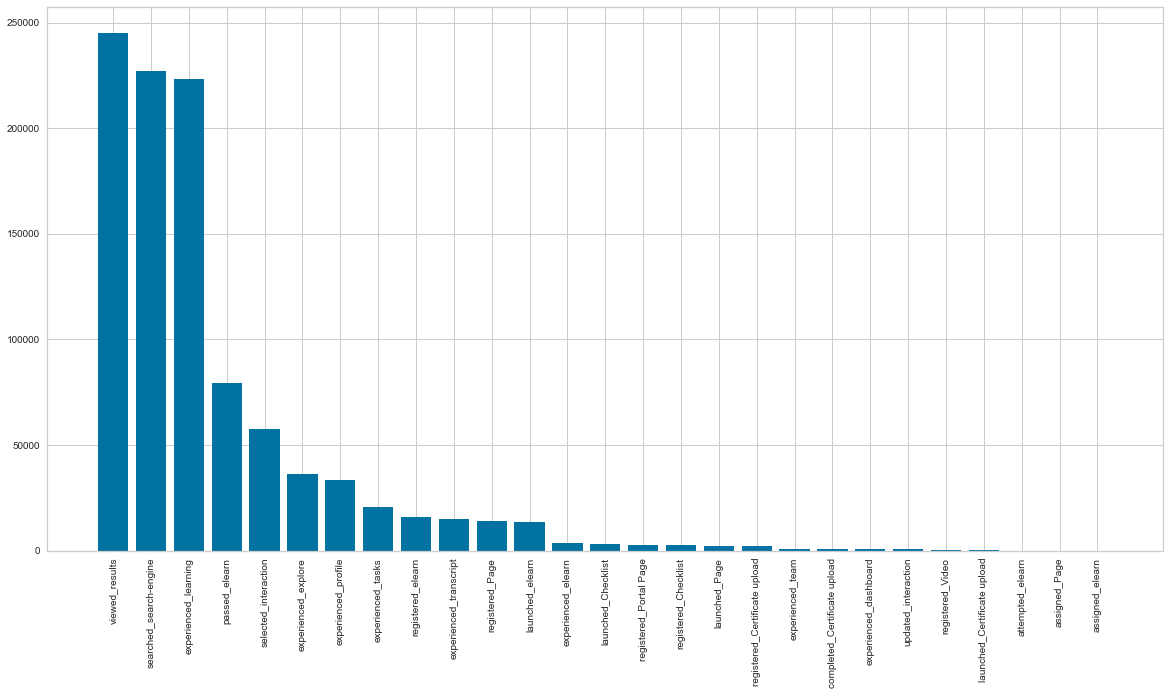

In [54]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_exploring_c3_action.index, df_exploring_c3_action['Count of Action'])
ax.set_xticklabels(df_exploring_c3_action.index, rotation = 90)
plt.show()

#### Cluster 4

In [55]:
df_nsae_cat_c4_vis = df_nsae_cat_c4.drop(columns=['actorId', 'cluster'])
df_exploring_c4_action = df_nsae_cat_c4_vis.sum(axis=0)
df_exploring_c4_action = df_exploring_c4_action.to_frame(name = "Count of Action")
df_exploring_c4_action = df_exploring_c4_action.sort_values('Count of Action', ascending=False)
df_exploring_c4_action.head()

,Count of Action
experienced_learning,818792.0
passed_elearn,318201.0
viewed_results,156639.0
searched_search-engine,144702.0
experienced_profile,123980.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/615156722.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_exploring_c4_action.index, rotation = 90)


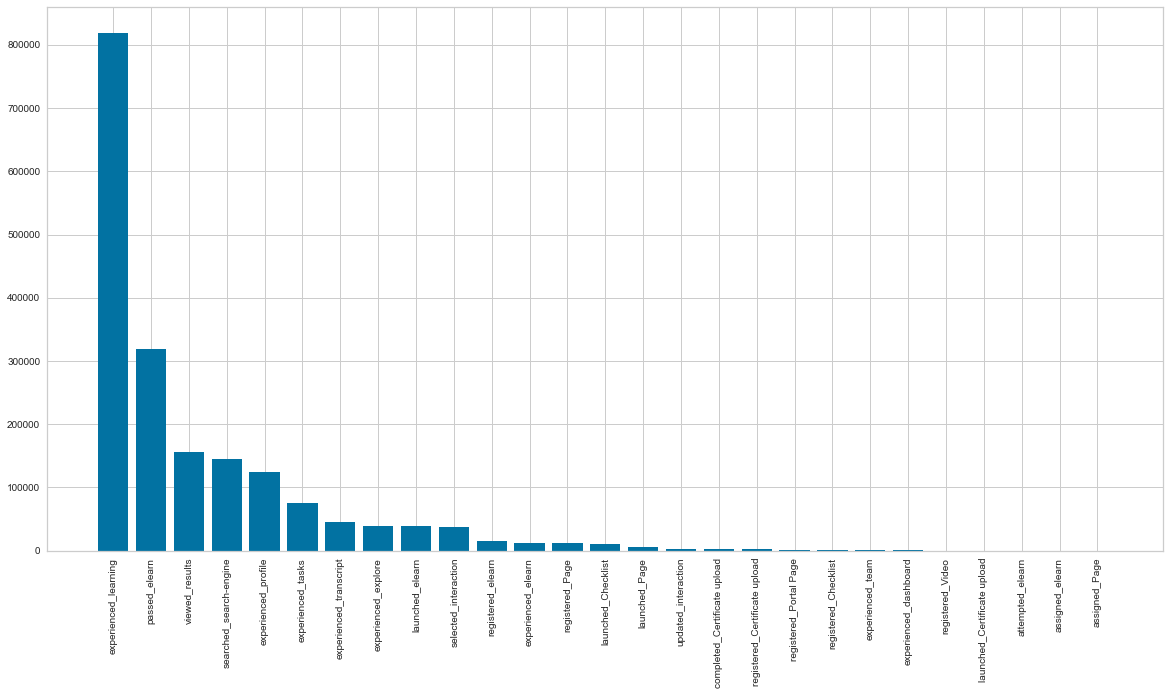

In [56]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_exploring_c4_action.index, df_exploring_c4_action['Count of Action'])
ax.set_xticklabels(df_exploring_c4_action.index, rotation = 90)
plt.show()

#### Clusters together

In [57]:
df_exploring_action = df_exploring_c0_action.rename(columns={'Count of Action': 'count_c0'})
df_exploring_action = pd.concat([df_exploring_action, df_exploring_c1_action], axis=1)
df_exploring_action = df_exploring_action.rename(columns={'Count of Action': 'count_c1'})
df_exploring_action = pd.concat([df_exploring_action, df_exploring_c2_action], axis=1)
df_exploring_action = df_exploring_action.rename(columns={'Count of Action': 'count_c2'})
df_exploring_action = pd.concat([df_exploring_action, df_exploring_c3_action], axis=1)
df_exploring_action = df_exploring_action.rename(columns={'Count of Action': 'count_c3'})
df_exploring_action = pd.concat([df_exploring_action, df_exploring_c4_action], axis=1)
df_exploring_action = df_exploring_action.rename(columns={'Count of Action': 'count_c4'})
df_exploring_action = df_exploring_action.loc[(df_exploring_action['count_c0'] >= 1000) & (df_exploring_action['count_c1'] >= 1000) & (df_exploring_action['count_c2'] >= 1000) & (df_exploring_action['count_c3'] >= 1000) & (df_exploring_action['count_c4'] >= 1000)]
df_exploring_action

,count_c0,count_c1,count_c2,count_c3,count_c4
experienced_learning,392318.0,91904.0,71009.0,223135.0,818792.0
passed_elearn,136836.0,28592.0,18176.0,79155.0,318201.0
experienced_profile,98047.0,16793.0,13055.0,33525.0,123980.0
experienced_tasks,71385.0,11234.0,8744.0,20849.0,75865.0
viewed_results,64399.0,29832.0,106049.0,245114.0,156639.0
searched_search-engine,54530.0,27977.0,96352.0,227211.0,144702.0
experienced_transcript,48321.0,7723.0,6919.0,14926.0,45925.0
experienced_explore,28292.0,6661.0,14942.0,36322.0,38775.0
selected_interaction,27665.0,5558.0,34991.0,57645.0,36745.0
launched_elearn,25313.0,2960.0,5887.0,13613.0,38605.0


#### Grouped bar chart

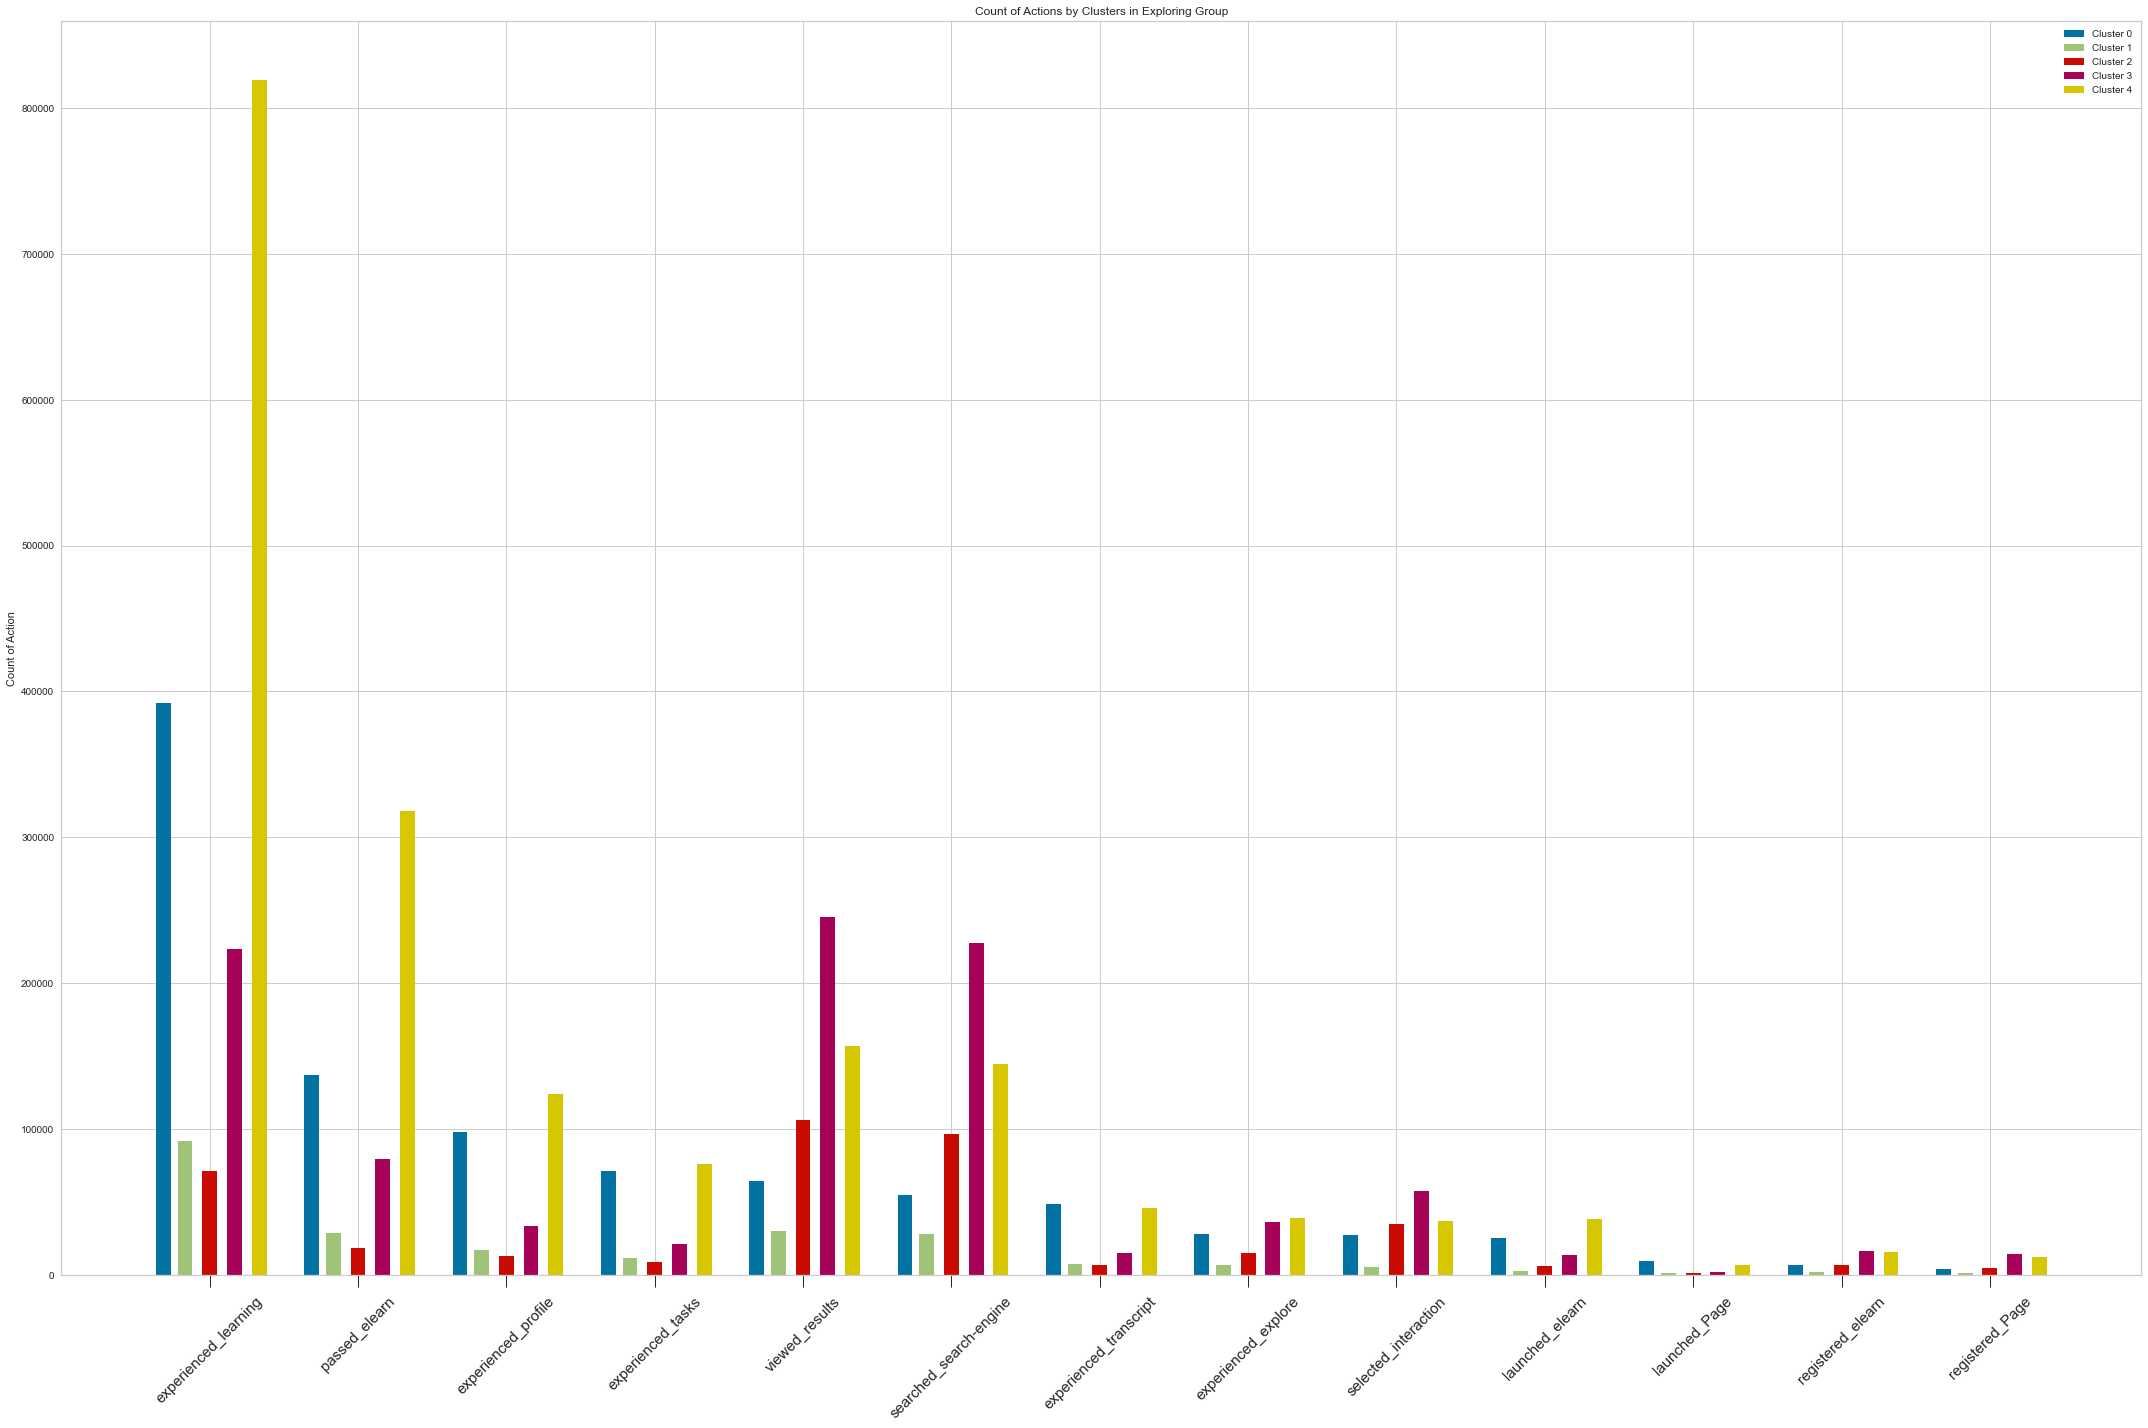

In [59]:
labels = df_exploring_action.index
x = np.arange(len(labels))
width_1 = 5
width_2 = 0.1

fig, ax = plt.subplots(figsize = (30,20))
r1 = ax.bar(x - width_1/16, df_exploring_action['count_c0'], width_2, label = 'Cluster 0')
r2 = ax.bar(x - width_1/30, df_exploring_action['count_c1'], width_2, label = 'Cluster 1')
r3 = ax.bar(x, df_exploring_action['count_c2'], width_2, label = 'Cluster 2')
r4 = ax.bar(x + width_1/30, df_exploring_action['count_c3'], width_2, label = 'Cluster 3')
r5 = ax.bar(x + width_1/15, df_exploring_action['count_c4'], width_2, label = 'Cluster 4')

ax.set_ylabel('Count of Action')
ax.set_title('Count of Actions by Clusters in Exploring Group')
ax.set_xticks(x, labels, rotation = 45, fontsize = 15)
ax.tick_params(axis = 'x', which = 'major', length = 12)
ax.legend()

fig.tight_layout()

plt.show()

# Learning Group

### Clustering with Action Features

/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/1268017992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nsal_new['occurence'] = 1


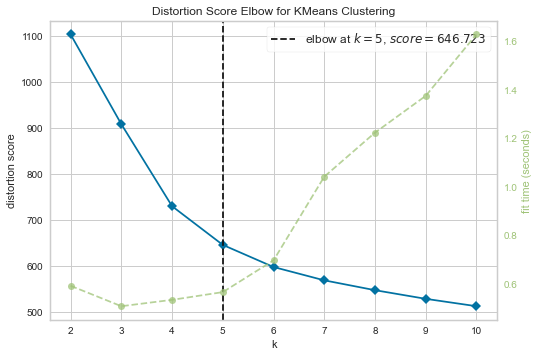

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# select social group
df_new_starter_action_learning = df_new_starter_action[df_new_starter_action['learning'] == True]

# verb count
vc = df_new_starter_action_learning['action'].value_counts()

# select verb frequency over 100 and convert to list
vc_list = vc[vc > 100].index.tolist()

# filter data by verb list
df_new_starter_action_learning_filter = df_new_starter_action_learning[df_new_starter_action_learning['action'].isin(vc_list)]
df_nsal_new = df_new_starter_action_learning_filter
df_nsal_new['occurence'] = 1

# generate pivot table
df_nsal_pivot = pd.pivot_table(df_nsal_new, values = 'occurence', index='actorId', columns='action', aggfunc='count')

# convert pivot table to df
df_nsal_pivot = df_nsal_pivot.reset_index()

# remove index header
df_nsal_pivot = df_nsal_pivot.rename_axis(None, axis = 1)

# replace Nan with 0 for an entire dataframe
df_nsal_pivot = df_nsal_pivot.replace(np.nan, 0)

# generate df without actorId
df_nsal_noid = df_nsal_pivot.loc[:, df_nsal_pivot.columns != 'actorId']

# scale with normalisation
scaler = MinMaxScaler(feature_range = (0,1))
df_nsal_scaled = pd.DataFrame(scaler.fit_transform(df_nsal_noid), columns=df_nsal_noid.columns)

# plot elbow chart 
model = KMeans(random_state=1)

elb_visualizer_nsal_eb = KElbowVisualizer(model, k = (2,11))
elb_visualizer_nsal_eb.fit(df_nsal_scaled)
elb_visualizer_nsal_eb.show()

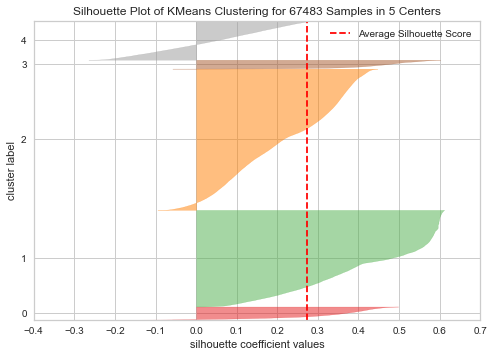

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 67483 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
model_4clust = KMeans(n_clusters=5, random_state=1)

sil_visualizer_nsal_sh = SilhouetteVisualizer(model_4clust)
sil_visualizer_nsal_sh.fit(df_nsal_scaled)
sil_visualizer_nsal_sh.show()

In [43]:
df_nsal_cat = df_nsal_pivot
df_nsal_cat['cluster'] = sil_visualizer_nsal_sh.labels_
df_nsal_cat.head()

,actorId,assigned_Page,assigned_elearn,attempted_elearn,completed_Checklist,completed_Document,completed_External Link,completed_Page,completed_Portal Page,completed_Video,...,experienced_learning,launched_Page,launched_elearn,passed_elearn,registered_Checklist,registered_Page,registered_Portal Page,registered_Video,registered_elearn,cluster
0,12.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,...,26.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,9.0,2
1,18.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,1.0,1.0,...,32.0,0.0,1.0,6.0,0.0,0.0,2.0,0.0,0.0,1
2,23.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0,0.0,...,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,25.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,13.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1
4,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,1


In [44]:
df_nsal_summary = df_nsal_cat.groupby("cluster").mean().round()
df_nsal_summary['count'] = df_nsal_cat.groupby("cluster").size()
df_nsal_summary

,actorId,assigned_Page,assigned_elearn,attempted_elearn,completed_Checklist,completed_Document,completed_External Link,completed_Page,completed_Portal Page,completed_Video,...,experienced_learning,launched_Page,launched_elearn,passed_elearn,registered_Checklist,registered_Page,registered_Portal Page,registered_Video,registered_elearn,count
cluster,,,,,,,,,,,,,,,,,,,,,
0,107137.0,0.0,0.0,0.0,3.0,0.0,0.0,99.0,0.0,4.0,...,48.0,0.0,3.0,27.0,0.0,0.0,0.0,0.0,2.0,2987
1,105448.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,3.0,...,13.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,21823
2,111358.0,0.0,0.0,0.0,4.0,0.0,0.0,11.0,0.0,7.0,...,23.0,0.0,1.0,9.0,0.0,1.0,0.0,0.0,1.0,31894
3,108885.0,0.0,0.0,0.0,4.0,29.0,0.0,21.0,0.0,27.0,...,31.0,0.0,2.0,10.0,0.0,2.0,0.0,0.0,1.0,2009
4,128216.0,0.0,0.0,0.0,3.0,0.0,0.0,21.0,1.0,22.0,...,41.0,1.0,3.0,15.0,0.0,1.0,0.0,0.0,1.0,8770


### Exploring clusters - Visualisations

In [45]:
# 5 clusters
df_nsal_cat_c0 = df_nsal_cat[df_nsal_cat['cluster'] == 0]
df_nsal_cat_c1 = df_nsal_cat[df_nsal_cat['cluster'] == 1]
df_nsal_cat_c2 = df_nsal_cat[df_nsal_cat['cluster'] == 2]
df_nsal_cat_c3 = df_nsal_cat[df_nsal_cat['cluster'] == 3]
df_nsal_cat_c4 = df_nsal_cat[df_nsal_cat['cluster'] == 4]

#### Cluster 0

In [61]:
df_nsal_cat_c0_vis = df_nsal_cat_c0.drop(columns=['actorId', 'cluster'])
df_learning_c0_action = df_nsal_cat_c0_vis.sum(axis=0)
df_learning_c0_action = df_learning_c0_action.to_frame(name = "Count of Action")
df_learning_c0_action = df_learning_c0_action.sort_values('Count of Action', ascending=False)
df_learning_c0_action.head()

,Count of Action
completed_Page,296499.0
completed_elearn,161065.0
experienced_learning,144865.0
passed_elearn,81952.0
completed_Video,11409.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/3278060145.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_learning_c0_action.index, rotation = 90)


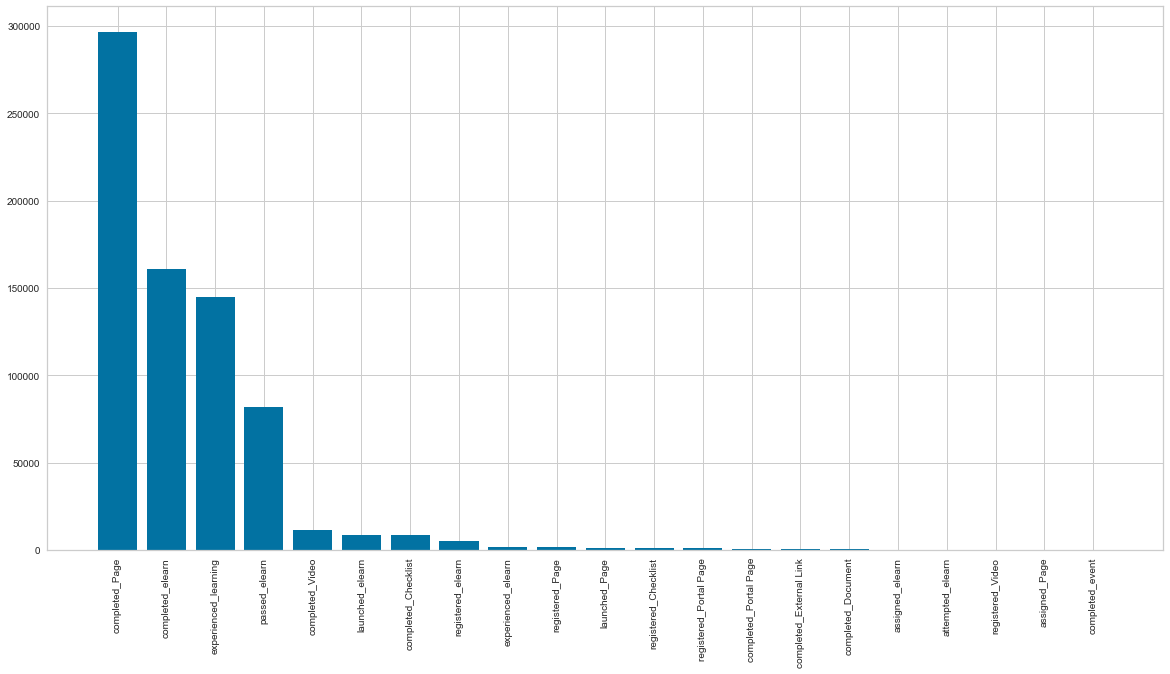

In [62]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_learning_c0_action.index, df_learning_c0_action['Count of Action'])
ax.set_xticklabels(df_learning_c0_action.index, rotation = 90)
plt.show()

#### Cluster 1

In [63]:
df_nsal_cat_c1_vis = df_nsal_cat_c1.drop(columns=['actorId', 'cluster'])
df_learning_c1_action = df_nsal_cat_c1_vis.sum(axis=0)
df_learning_c1_action = df_learning_c1_action.to_frame(name = "Count of Action")
df_learning_c1_action = df_learning_c1_action.sort_values('Count of Action', ascending=False)
df_learning_c1_action.head()

,Count of Action
experienced_learning,280857.0
completed_elearn,188355.0
completed_Page,101542.0
passed_elearn,79594.0
completed_Video,60525.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/1656067075.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_learning_c1_action.index, rotation = 90)


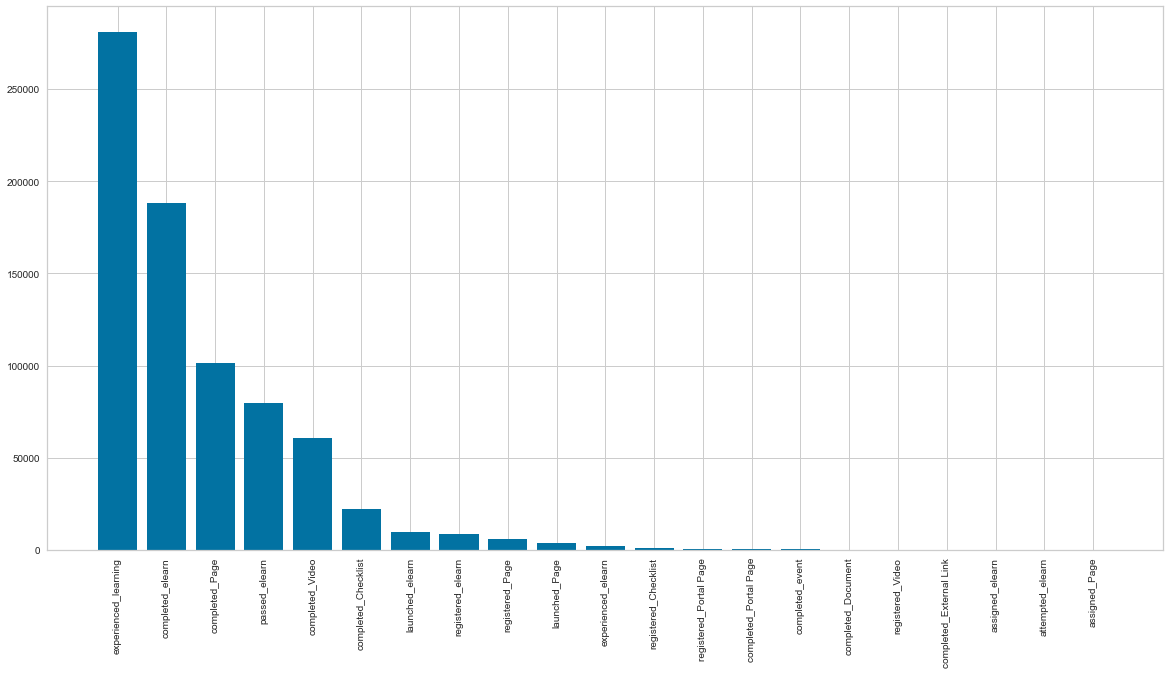

In [64]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_learning_c1_action.index, df_learning_c1_action['Count of Action'])
ax.set_xticklabels(df_learning_c1_action.index, rotation = 90)
plt.show()

#### Cluster 2

In [65]:
df_nsal_cat_c2_vis = df_nsal_cat_c2.drop(columns=['actorId', 'cluster'])
df_learning_c2_action = df_nsal_cat_c2_vis.sum(axis=0)
df_learning_c2_action = df_learning_c2_action.to_frame(name = "Count of Action")
df_learning_c2_action = df_learning_c2_action.sort_values('Count of Action', ascending=False)
df_learning_c2_action.head()

,Count of Action
experienced_learning,748887.0
completed_elearn,455090.0
completed_Page,346120.0
passed_elearn,271592.0
completed_Video,208742.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/855864826.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_learning_c2_action.index, rotation = 90)


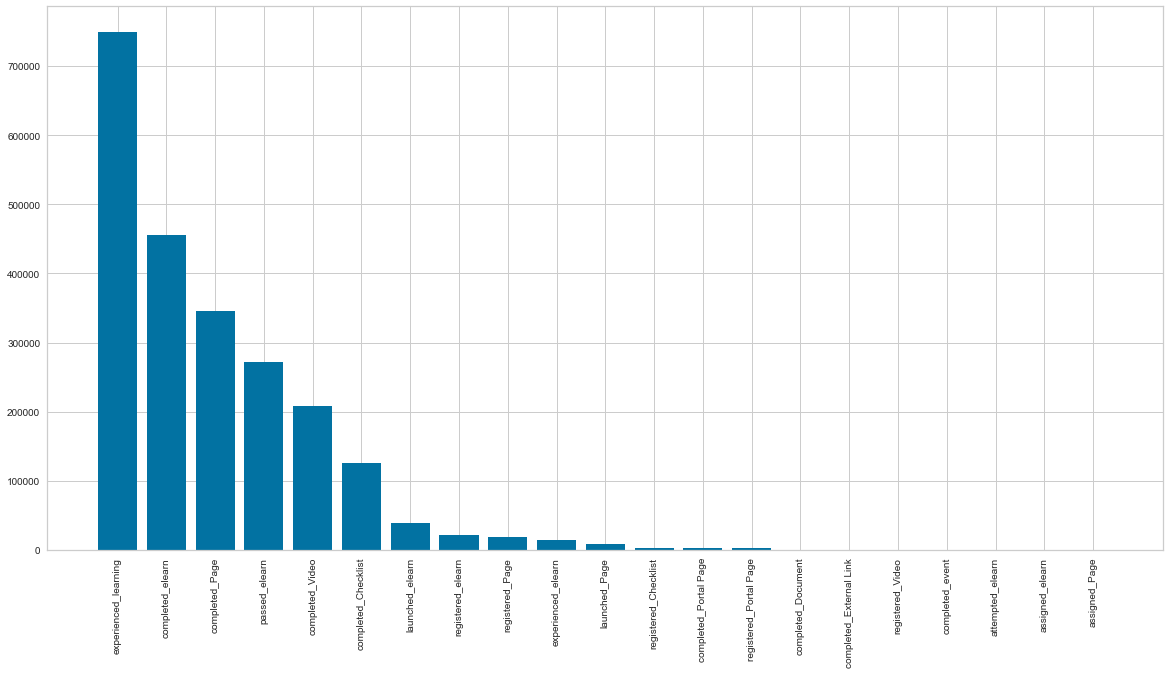

In [66]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_learning_c2_action.index, df_learning_c2_action['Count of Action'])
ax.set_xticklabels(df_learning_c2_action.index, rotation = 90)
plt.show()

#### Cluster 3

In [67]:
df_nsal_cat_c3_vis = df_nsal_cat_c3.drop(columns=['actorId', 'cluster'])
df_learning_c3_action = df_nsal_cat_c3_vis.sum(axis=0)
df_learning_c3_action = df_learning_c3_action.to_frame(name = "Count of Action")
df_learning_c3_action = df_learning_c3_action.sort_values('Count of Action', ascending=False)
df_learning_c3_action.head()

,Count of Action
experienced_learning,63083.0
completed_Document,57345.0
completed_Video,54963.0
completed_Page,42200.0
completed_elearn,36635.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/1754641223.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_learning_c3_action.index, rotation = 90)


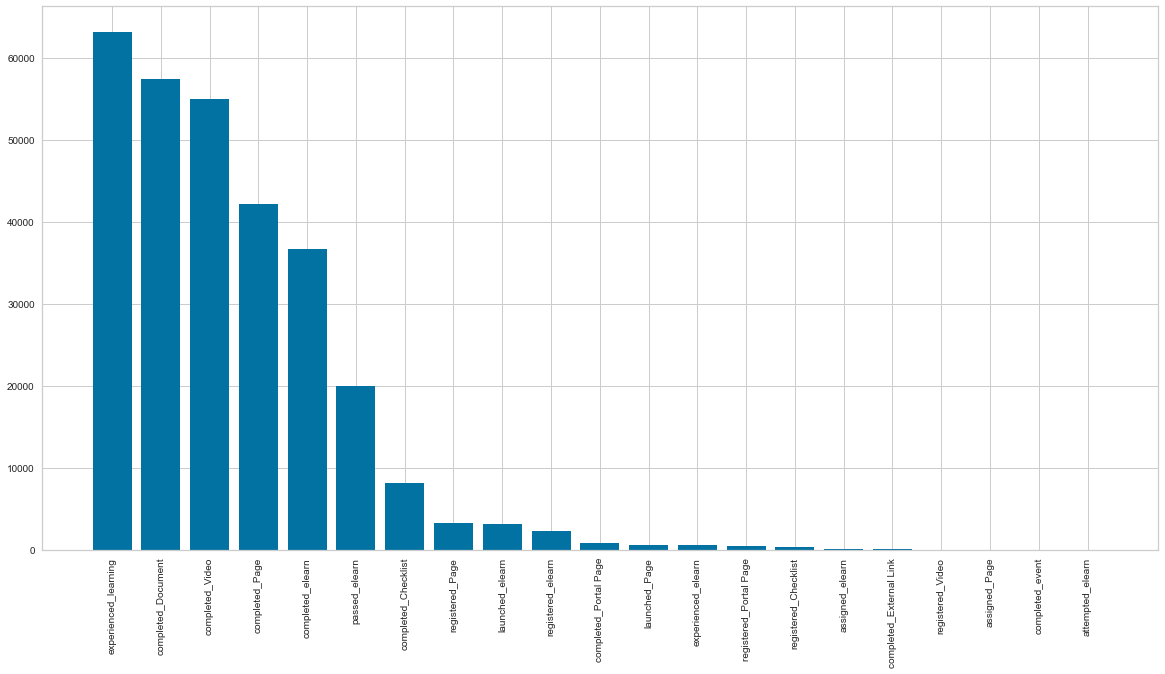

In [68]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_learning_c3_action.index, df_learning_c3_action['Count of Action'])
ax.set_xticklabels(df_learning_c3_action.index, rotation = 90)
plt.show()

#### Cluster 4

In [69]:
df_nsal_cat_c4_vis = df_nsal_cat_c4.drop(columns=['actorId', 'cluster'])
df_learning_c4_action = df_nsal_cat_c4_vis.sum(axis=0)
df_learning_c4_action = df_learning_c4_action.to_frame(name = "Count of Action")
df_learning_c4_action = df_learning_c4_action.sort_values('Count of Action', ascending=False)
df_learning_c4_action.head()

,Count of Action
experienced_learning,359466.0
completed_elearn,217181.0
completed_Video,189721.0
completed_Page,182791.0
passed_elearn,127871.0


/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_16288/724509332.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_learning_c4_action.index, rotation = 90)


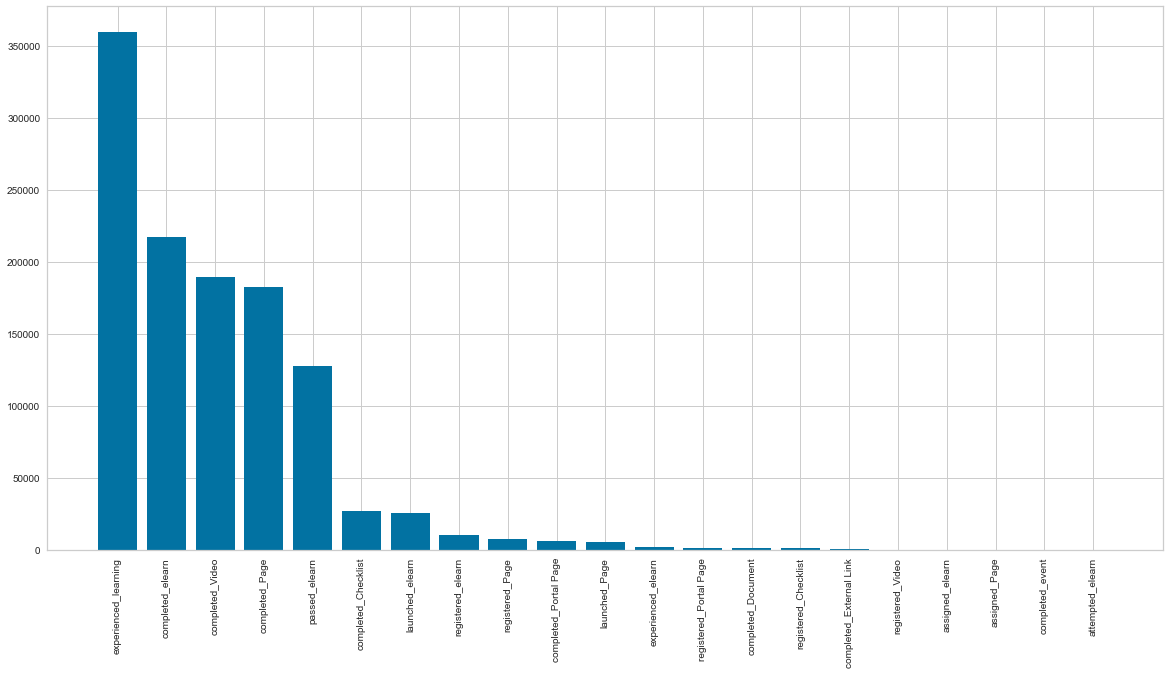

In [70]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(df_learning_c4_action.index, df_learning_c4_action['Count of Action'])
ax.set_xticklabels(df_learning_c4_action.index, rotation = 90)
plt.show()

#### Clusters together

In [71]:
df_learning_action = df_learning_c0_action.rename(columns={'Count of Action': 'count_c0'})
df_learning_action = pd.concat([df_learning_action, df_learning_c1_action], axis=1)
df_learning_action = df_learning_action.rename(columns={'Count of Action': 'count_c1'})
df_learning_action = pd.concat([df_learning_action, df_learning_c2_action], axis=1)
df_learning_action = df_learning_action.rename(columns={'Count of Action': 'count_c2'})
df_learning_action = pd.concat([df_learning_action, df_learning_c3_action], axis=1)
df_learning_action = df_learning_action.rename(columns={'Count of Action': 'count_c3'})
df_learning_action = pd.concat([df_learning_action, df_learning_c4_action], axis=1)
df_learning_action = df_learning_action.rename(columns={'Count of Action': 'count_c4'})
df_learning_action = df_learning_action.loc[(df_learning_action['count_c0'] >= 1000) & (df_learning_action['count_c1'] >= 1000) & (df_learning_action['count_c2'] >= 1000) & (df_learning_action['count_c3'] >= 1000) & (df_learning_action['count_c4'] >= 1000)]
df_learning_action

,count_c0,count_c1,count_c2,count_c3,count_c4
completed_Page,296499.0,101542.0,346120.0,42200.0,182791.0
completed_elearn,161065.0,188355.0,455090.0,36635.0,217181.0
experienced_learning,144865.0,280857.0,748887.0,63083.0,359466.0
passed_elearn,81952.0,79594.0,271592.0,19951.0,127871.0
completed_Video,11409.0,60525.0,208742.0,54963.0,189721.0
launched_elearn,8727.0,9552.0,39356.0,3142.0,25601.0
completed_Checklist,8274.0,22279.0,125170.0,8204.0,27186.0
registered_elearn,4829.0,8771.0,20873.0,2338.0,10404.0
registered_Page,1399.0,5703.0,18054.0,3252.0,7416.0


#### Grouped bar chart

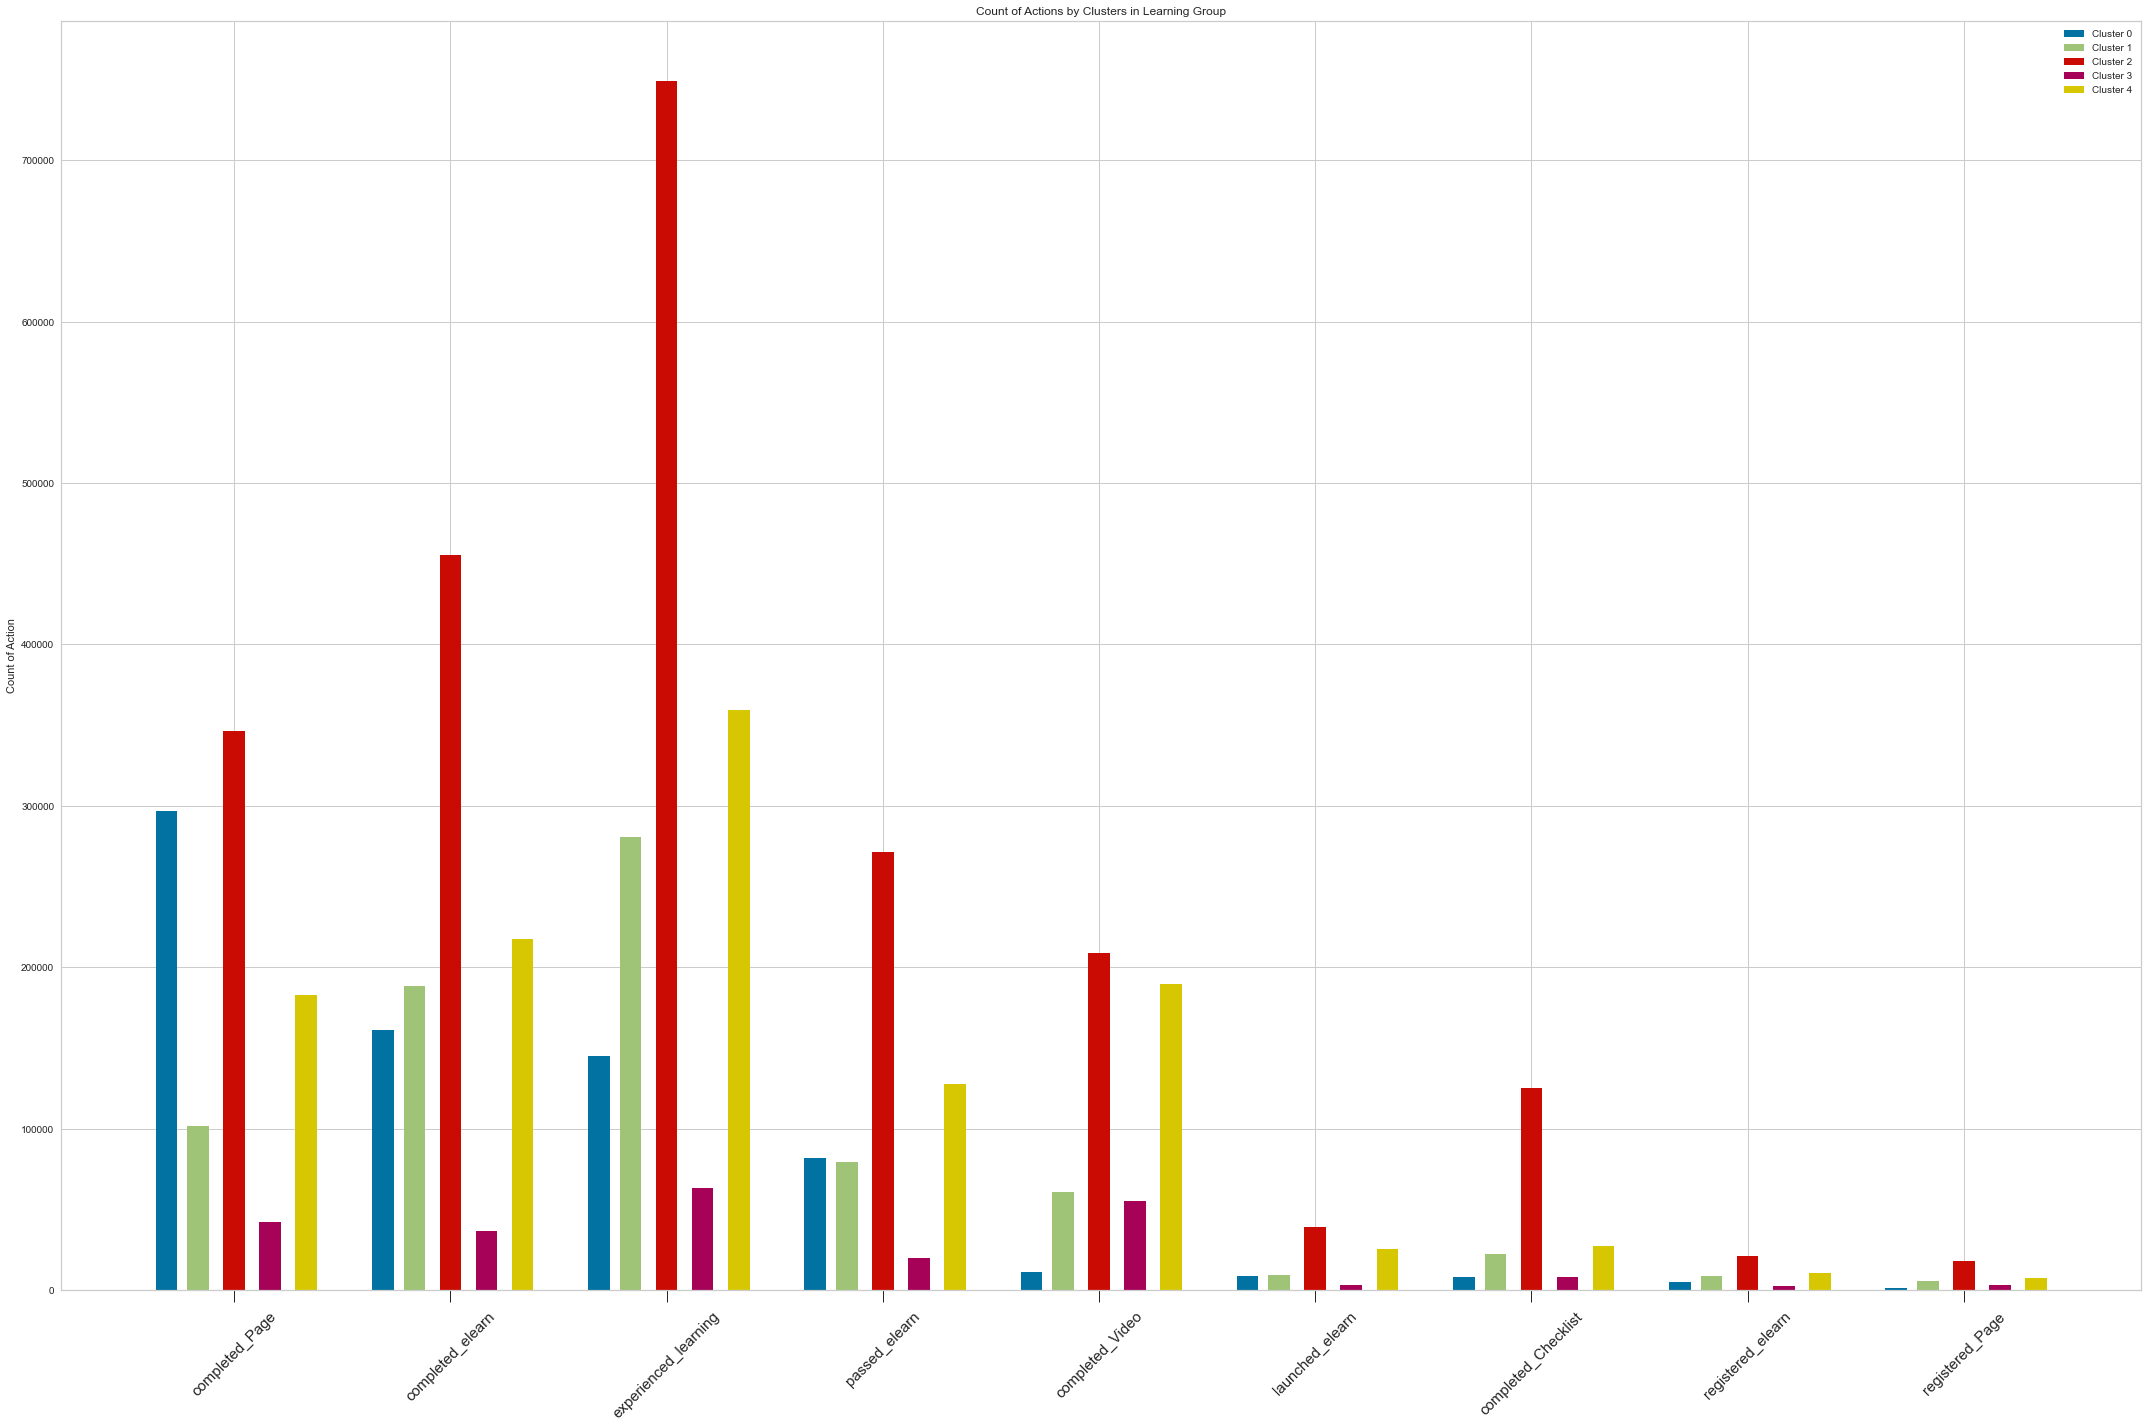

In [72]:
labels = df_learning_action.index
x = np.arange(len(labels))
width_1 = 5
width_2 = 0.1

fig, ax = plt.subplots(figsize = (30,20))
r1 = ax.bar(x - width_1/16, df_learning_action['count_c0'], width_2, label = 'Cluster 0')
r2 = ax.bar(x - width_1/30, df_learning_action['count_c1'], width_2, label = 'Cluster 1')
r3 = ax.bar(x, df_learning_action['count_c2'], width_2, label = 'Cluster 2')
r4 = ax.bar(x + width_1/30, df_learning_action['count_c3'], width_2, label = 'Cluster 3')
r5 = ax.bar(x + width_1/15, df_learning_action['count_c4'], width_2, label = 'Cluster 4')

ax.set_ylabel('Count of Action')
ax.set_title('Count of Actions by Clusters in Learning Group')
ax.set_xticks(x, labels, rotation = 45, fontsize = 15)
ax.tick_params(axis = 'x', which = 'major', length = 12)
ax.legend()

fig.tight_layout()

plt.show()